# Sommaire

# Introduction

Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université. 

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

 

Mark aimerait explorer les pays avec un fort potentiel de clients pour les services de academy, et comment ce potentiel pourrait évoluer. 

Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :

Hello,

 

Les données sont disponibles sur ce site de la Banque mondiale ou en téléchargement direct à ce lien.

 

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4 000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site.

 

Pour la pré-analyse, pourrais-tu :

valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)
 

Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

 

Merci !

# Import des librairies

In [7]:
import sys
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Vérification des numéros de version des librairies

In [9]:
print('Version des librairies utilisées :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('MissingNO     : ' + msno.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)

Version des librairies utilisées :
Python        : 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:12:24) [GCC 11.2.0]
NumPy         : 1.26.4
Pandas        : 2.2.2
MissingNO     : 0.5.2
Matplotlib    : 3.8.4
Seaborn       : 0.13.2


# Etape 1 : Menez une analyse générale des données


## Import des datasets

### EdStatsCountry

In [13]:
country_df = pd.read_csv("./Datasets/EdStatsCountry.csv")

### EdStatsCountry-Series

In [15]:
country_series_df = pd.read_csv("./Datasets/EdStatsCountry-Series.csv")

### EdStatsData

In [17]:
data_df = pd.read_csv("./Datasets/EdStatsData.csv")

### EdStatsFootNote

In [19]:
footnote_df = pd.read_csv("./Datasets/EdStatsFootNote.csv")

### EdStatsSeries

In [21]:
series_df = pd.read_csv("./Datasets/EdStatsSeries.csv")

## Analyse du dataset EdStatsCountry

### Affichons les premières lignes du dataset

In [24]:
country_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [26]:
nombre_lignes = country_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = country_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 241 lignes dans ce dataset
Il y a 32 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [28]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

### Analyse du type des données présentes dans le dataset

In [30]:
country_df.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

### Vérifions si des valeurs sont manquantes dans le dataset

In [32]:
country_df.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [33]:
somme_nan = country_df.isnull().sum().sum()
print(f"Il y a {somme_nan} valeurs manquantes dans le dataset")

Il y a 2354 valeurs manquantes dans le dataset


### Vérifions si des valeurs sont dupliquées dans le dataset

In [35]:
country_df_duplicate = country_df[country_df.duplicated("Country Code")]
print(f"Il y a {country_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Ce dataset présente les différents pays contenus dans l'étude.
- Le jeu de données contient 241 lignes et 32 colonnes.
- Nous pouvons constater qu'il manque 2354 valeurs sur l'ensemble du dataset.
- Il ne semble pas y avoir de doublons de pays.

Notes :
- Les informations concernant la "region" et "l'income group" peuvent être pertinentes pour le reste de l'analyse.
- La colonne "Unnamed: 31" est complètement vide et pourra être supprimée.

## Analyse du dataset EdStatsCountry-Series

### Affichons les premières lignes du dataset

In [39]:
country_series_df.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [41]:
nombre_lignes = country_series_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = country_series_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 613 lignes dans ce dataset
Il y a 4 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [43]:
country_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


### Analyse du type des données présentes dans le dataset

In [45]:
country_series_df.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

### Vérifions si des valeurs sont manquantes dans le dataset

In [47]:
country_series_df.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

### Vérifions si des valeurs sont dupliquées dans le dataset

In [49]:
country_series_df_duplicate = country_series_df[country_series_df.duplicated()]
print(f"Il y a {country_series_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Ce dataset présente les sources des indicateurs par pays.
- Le jeu de données contient 613 lignes et 4 colonnes.
- Il ne semble pas y avoir de doublons.

Notes :
- La colonne "Unnamed: 3" est complètement vide et pourra être supprimée

## Analyse du dataset EdStatsData

### Affichons les premières lignes du dataset

In [53]:
data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [55]:
nombre_lignes = data_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = data_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 886930 lignes dans ce dataset
Il y a 70 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [57]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### Analyse du type des données présentes dans le dataset

In [59]:
data_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

### Vérifions si des valeurs sont manquantes dans le dataset

In [61]:
data_df.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [ ]:
msno.bar(data_df)

<Axes: >

### Vérifions si des valeurs sont dupliquées dans le dataset

In [ ]:
data_df_duplicate = data_df[data_df.duplicated()]
print(f"Il y a {data_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

### Conclusion

- Ce dataset présente les données des différents par pays et pour un semble d'années.
- Le jeu de données contient 886930 lignes et 70 colonnes.
- Nous pouvons constater qu'il manque un nombre important de données, notamment :
    - Après 2015
    - On constate que beaucoup plus de données sont présentes à partir de 1990
    - Egalement certains indicateurs ne doivent pas comporter énormément de données (la taille des barres des années étant très en déça des taille des barres des pays par exemple)
- Il ne semble pas y avoir de doublons.

Notes :
- Nous devrons procéder à une vérification si le nombre de données présentes lors de la sélection des indicateurs 
- La colonne "Unnamed: 69" est complètement vide et pourra être supprimée

In [ ]:
data_df_duplicate = data_df[data_df.duplicated()]
print(f"Il y a {data_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

## Analyse du dataset EdStatsFootNote

### Affichons les premières lignes du dataset

In [ ]:
footnote_df.head()

### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [ ]:
nombre_lignes = footnote_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = footnote_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

### Affiche des informations générales sur le dataset

In [ ]:
footnote_df.info()

### Analyse du type des données présentes dans le dataset

In [ ]:
footnote_df.dtypes

### Vérifions si des valeurs sont manquantes dans le dataset

In [ ]:
footnote_df.isnull().sum()

### Vérifions si des valeurs sont dupliquées dans le dataset

In [ ]:
footnote_df_duplicate = footnote_df[footnote_df.duplicated()]
print(f"Il y a {footnote_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

### Conclusion

- Le jeu de données contient 643638 lignes et 5 colonnes.
- Il ne semble pas y avoir de doublons.

Notes :
- La colonne "Unnamed: 4" est complètement vide et pourra être supprimée

## Analyse du dataset EdStatsSeries

### Affichons les premières lignes du dataset

In [ ]:
series_df.head()

### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [ ]:
nombre_lignes = series_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = series_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

### Affiche des informations générales sur le dataset

In [ ]:
series_df.info()

### Analyse du type des données présentes dans le dataset

In [ ]:
series_df.dtypes

### Vérifions si des valeurs sont manquantes dans le dataset

In [ ]:
series_df.isnull().sum()

### Vérifions si des valeurs sont dupliquées dans le dataset

In [ ]:
series_df_duplicate = series_df[series_df.duplicated()]
print(f"Il y a {series_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

### Conclusion

- Ce dataset présente la description des différents indicateurs présents dans l'étude.
- Le jeu de données contient 3665 lignes et 21 colonnes.
- Nous pouvons constater qu'il manque un nombre important de données, cependant la définition longue est présente pour chaque indicateur.
- Il ne semble pas y avoir de doublons.

Notes :
- Nous pourrons nous appuyer sur ce jeu de données pour faire notre sélection d'indicateurs.
- La colonne "Unnamed: 69" est complètement vide et pourra être supprimée

# Etape 2 : Sélectionnez les données pertinentes

## Plage de temps étudiée

Lors de notre analyse du dataframe data, nous avons constaté que les années répertoriant le plus d'informations sont comprises entre 1990 et 2015. 
Commencons par réduire la taille de notre jeu de données data en supprimant les années qui ne semblent pas pertinentes.

In [ ]:
# On récupère la liste des colonnes dans une liste
annees = data_df.columns.to_list()

In [ ]:
# On supprime les colonnes ne représentant pas des années
annees.remove('Country Name')
annees.remove('Country Code')
annees.remove('Indicator Name')
annees.remove('Indicator Code')
annees.remove('Unnamed: 69')

In [ ]:
# Pour chaque année dans la liste, on vérifie si elle est supérieure à 1990 et inférieure à 2015 pour décider ou non de la supprimer
annees_a_suppr = []
annees_conservees = []
for annee in annees :
    if int(annee) < 1990 :
        annees_a_suppr.append(annee)
    elif int(annee) > 2015 :
        annees_a_suppr.append(annee)
    else :
        annees_conservees.append(annee)

In [ ]:
# On supprime toutes les colonnes des années que nous avons précédemment sélectionné
data = data_df.drop(labels=annees_a_suppr, axis= 1)

## Réorganisons notre dataframe

Afin de faciliter les études ultérieures, nous allons réorganiser notre dataframe comme suit :
- une colonne pour l'indicator code
- une colonne pour l'indicator name
- une colonne pour le country name
- une colonne pour le country code
- une colonne pour les années
- une colonnes pour les valeurs

In [ ]:
data_melted = data.melt(id_vars=["Indicator Code", "Indicator Name", "Country Code", "Country Name"], 
             value_vars=annees_conservees,
             var_name="Year", value_name="Values")
data_melted

## Volume de données de chaque indicateur

Dans notre dataframe data, nous allons ici chercher à mettre en évidence la quantité de données disponible pour chaque indicateur, cela nous permettra de sélectionner uniquement des indicateurs pour lesquels nous aurons un volume de données suffisant (ce volume étant à déterminer!)

In [ ]:
# Premièrement on utilise un groupby pour compter le nombre de valeurs présentes pour chaque indicateur année par année
compte_indicateurs = data_melted.groupby(["Indicator Code"], as_index=False).count().sort_values(by="Values", ascending=True)
compte_indicateurs

In [ ]:
# Supprimons les indicateurs pour lesquels nous avons au moins la moitié des valeurs
# Note : pour chaque indicateur nous avons toutes les années de renseignées, 
# cela représente donc 6292 valeurs possible, soit 3146 pour la moitié
# Lors du deuxième échantillonage, nous conserversons 1258 en valeur de référence soit 20% de l'échantillon total
indicateurs_vides = compte_indicateurs.loc[compte_indicateurs["Values"] < 1258, "Indicator Code"]

In [ ]:
# Afin d'avoir un dataframe, effectuons un reset index
indicateurs_vides = indicateurs_vides.reset_index()
indicateurs_vides.shape

Nous avons ici choisit de conserver les indicateurs pour lesquels nous avons suffisament de données (à 50%).

Nous conservons ainsi 368 indicateurs : 3665 indicateurs au départ moins 3297 à supprimer

Ayant été trop restrictif en ne sélectionnant que les indicateurs ne contenant que 50% de données et étant donné que certains indicateurs ne sont complétés qu'une fois tous les 5 ans, soit 20% de notre échantillon temporel, nous avons utiliser ce nouveau seuil.

Nous conservons ainsi 715 indicateurs : 3655 indicateurs de départ moins 2950 à supprimer

Simplifions notre dataframe

In [ ]:
# On compare la colonne "Indicator Code" du dataframe avec la série des "Indicator Code" sélectionnée auparavant
data = data_melted.loc[~(data_melted["Indicator Code"].isin(indicateurs_vides["Indicator Code"].to_list())), :]
data

## Réduction du dataframe series_df avec les même indicateurs que précédemment

In [ ]:
series_df = series_df.loc[series_df["Series Code"].isin(data["Indicator Code"].to_list()), :]
series_df

Note : nous n'avons plus que 693 indicateurs, contre 715 dans le dataframe data.

## Consultation d'un expert "métier" pour nous aider dans notre sélection

Celui-ci nous propose des idées d'indicateurs pertinents 
1. Niveau d'éducation de la population :
- Taux de scolarisation dans l'enseignement secondaire et supérieur.
- Taux de diplomation dans le secondaire et l'enseignement supérieur.

2. Compétences numériques :
- Pourcentage de la population avec des compétences de base en informatique ou en technologie numérique.
- Programmes d’éducation technologique ou initiatives gouvernementales liées à l’apprentissage en ligne.

3. Investissement en éducation :
- Dépenses publiques consacrées à l’éducation, particulièrement dans l'enseignement supérieur.
- Politiques nationales favorisant l'accès à l'éducation en ligne ou à distance.

4. Accès aux infrastructures numériques :
- Taux de couverture du réseau internet à haut débit (broadband penetration rate).
- Taux de couverture mobile, en particulier la 4G ou la 5G.

5. Langues parlées :
- Distribution linguistique pour comprendre dans quelles langues les cours en ligne devraient être proposés.

6. Pouvoir d'achat et développement économique :
- Revenu moyen par habitant ou PIB par habitant, pour évaluer la capacité des familles ou des étudiants à investir dans des services éducatifs en ligne.

7. Taux de chômage des jeunes :
- Indicateur de la demande potentielle pour des formations en ligne visant à améliorer les compétences et l'employabilité.

8. Démographie des étudiants :
- Proportion de la population âgée de 15 à 24 ans (groupe cible pour des cours de niveau lycée ou universitaire).

Nous utiliserons ces pistes pour la sélection de nos indicateurs

### Créons une liste pour stocker les indicateurs que nous sélectionnerons au fur et à mesure

In [ ]:
indicateurs = []

### Notre startup propose des contenus en ligne, intéressons nous donc à la catégorie "Infrastructure: Communications"

In [ ]:
series_df.loc[series_df["Topic"]=="Infrastructure: Communications"]

In [ ]:
data.loc[data["Indicator Code"] == "IT.NET.USER.P2", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 81% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("IT.NET.USER.P2")

In [ ]:
data.loc[data["Indicator Code"] == "IT.CMP.PCMP.P2", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 41% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("IT.CMP.PCMP.P2")

### Recherchons des données sur le taux de scolarisation

#### Dans l'enseignement secondaire

In [ ]:
# Permet d'afficher la totalité des valeurs des colonnes
pd.set_option('max_colwidth', None)

series_df.loc[(series_df["Series Code"].str.contains("SEC")), ["Series Code", "Long definition"]]

Cet indicateur présente le nombre total d'élèves en age d'être dans le secondaire qui sont effectivement inscrit dans le secondaire

In [ ]:
data.loc[data["Indicator Code"] == "SE.SEC.ENRR", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 65% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("SE.SEC.ENRR")

#### Dans l'enseignement supérieur

In [ ]:
series_df.loc[(series_df["Series Code"].str.contains("TER")), ["Series Code", "Long definition"]]

In [ ]:
data.loc[data["Indicator Code"] == "SE.TER.ENRR", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 60% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("SE.TER.ENRR")

### Recherchons des données sur le taux de diplomation

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("graduates", case=False, na=False)), ["Series Code", "Long definition"]]

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("diplom", case=False, na=False)), ["Series Code", "Long definition"]]

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("exam", case=False, na=False)), ["Series Code", "Long definition"]]

Il ne semble pas y avoir d'indicateurs faisant mention du taux de reussite aux examens et l'obtention des diplomes.

Cependant un indicateur recense les étudiants admis au niveau supérieur. Celui-ci n'est disponible que pour le secondaire mais peut tout de même être intéressant.

In [ ]:
data.loc[data["Indicator Code"] == "SE.SEC.PROG.ZS", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 42% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("SE.SEC.PROG.ZS")

Afin de compléter l'échantillon, intéressons nous également aux temps passé en études

#### La durée légale des études

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("number of years", case=False, na=False)), ["Series Code", "Long definition"]]

In [ ]:
data.loc[data["Indicator Code"] == "SE.COM.DURS", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 51% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("SE.COM.DURS")

#### Le nombre d'années que les étudiants peuvent espérer passer à l'école

In [ ]:
data.loc[data["Indicator Code"] == "SE.SCH.LIFE", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 52% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("SE.SCH.LIFE")

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("Graduation", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]["Long definition"].value_counts()

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("Number of graduates from first degree programmes", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]

In [ ]:
data_df.loc[data_df["Indicator Code"] == "SE.TER.CMPL.ZS", :].shape[0]

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

### Recherchons des données sur les revenus

#### Revenu moyen par habitant

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("salar", case=False, na=False)), ["Series Code", "Long definition"]]

Aucun indicateur ne semble mentionner de données sur le niveau de salaire.

#### PIB par habitant

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("GNP", case=False, na=False)), ["Series Code", "Long definition"]]

In [ ]:
data.loc[data["Indicator Code"] == "NY.GNP.PCAP.CD", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 84% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("NY.GNP.MKTP.PP.CD")

### Recherchons des données démographiques

#### Proportion de la population agée de 15 à 24ans (niveau lycée ou universitaire)

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("population", case=False, na=False))
    & (series_df["Long definition"].str.contains("15", case=False, na=False)), ["Series Code", "Long definition"]]

In [ ]:
data.loc[data["Indicator Code"] == "SP.POP.1524.TO.UN", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 76% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("SP.POP.1524.TO.UN")

#### Nombre de professeurs

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("teacher", case=False, na=False)), ["Series Code", "Long definition"]]

In [ ]:
data.loc[data["Indicator Code"] == "SE.PRE.ENRL.TC.ZS", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 52% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("SE.PRE.ENRL.TC.ZS")

### Recherchons des données sur le chomage

In [ ]:
series_df.loc[(series_df["Long definition"].str.contains("unemployment", case=False, na=False)), ["Series Code", "Long definition"]]

In [ ]:
data.loc[data["Indicator Code"] == "SL.UEM.TOTL.ZS", "Values"].count() * 100 / 6292

L'indicateur présente bien des données, environ 76% de remplissage, il est donc retenu

In [ ]:
indicateurs.append("SL.UEM.TOTL.ZS")

### Vérification du nombre d'indicateurs sélectionnés

In [ ]:
print(len(indicateurs))

In [ ]:
# On repasse en affichage par défaut
pd.set_option('max_colwidth', 50)

### Premier constat

Suite à une première passe de sélection des indicateurs, nous ne trouvons que 9 indicateurs pouvant remplir nos exigences.
Etant donné que nos indicateurs sont, pour certains calculés qu'une fois tous les 5 ans, nous avons décider de diminuer le seuil de remplissage.

Après avoir élargi notre champ de recherche, nous avons réussi à identifier 2 indicateurs supplémentaires, soit 11 au total.

## Création de notre dataframe d'études

Pour cela nous sélectionnerons toutes les lignes du dataframe dont l'"Indicator Code" est présent dans la liste que nous avons créée précédemment

In [ ]:
df = data[data["Indicator Code"].isin(indicateurs)]
df.head()

In [ ]:
df.info()

In [ ]:
msno.bar(df)

In [ ]:
msno.matrix(df)

# Etape 3 : Créez un dataframe dans le but de mener une analyse

## Analysons notre dataframe sous le spectre des pays 

Premièrement, nous allons récupérer deux données intéressantes dans le dataframe country : la région et l'income group, qui permettront par la suite d'effectuer des analyses en fonction de ces paramètres.

In [ ]:
df_temp = country_df.loc[:, ["Country Code", "Region", "Income Group"]]
df_temp

Nous ne souhaitons conserver que les pays pour lesquels nous disposons de ces deux informations, aussi nous allons supprimer de notre dataframe "df_temp" les lignes qui n'ont pas de Region ou d'Income group

In [ ]:
df_temp = df_temp.loc[(~df_temp["Region"].isnull()) & (~df_temp["Income Group"].isnull()), :]
df_temp

Ensuite nous concaténons les deux dataframe dans un nouveau dataframe. Nous choisissons une jointure à droite afin de supprimer du dataframe final les pays qui n'ont pas de Region ou d'Income group renseigné (comme vu précédemment)

In [ ]:
data = pd.merge(df, df_temp, on="Country Code", how="right")
data

Nous cherchons ensuite à savoir si des pays ne présentent aucune données

In [ ]:
nb_valeurs_pays = data.groupby(["Country Code"], as_index=False).count().sort_values(by="Values", ascending=True)
nb_valeurs_pays

Nous constatons en effet que certains pays n'ont aucune valeur, et d'autres très peu (XKX par exemple).

Nous allons définir un seuil afin de supprimer les pays ne présentant pas suffisamment de données. 

Premièrement représentons la distribution des valeurs par pays.

In [ ]:
nb_valeurs_pays.boxplot(column="Values", vert=False)

Supprimons les outliers, ici les pays qui ont un nombre de valeurs inférieurs à 50

In [ ]:
liste_pays_a_suppr = nb_valeurs_pays.loc[nb_valeurs_pays["Values"] < 50, "Country Code"].tolist()
data = data.loc[~data["Country Code"].isin(liste_pays_a_suppr), :]
data

## Passons en revue les indicateurs

### Reprenons la liste de nos indicateurs

Parmi les indicateurs 3 apparaissent primordiaux. En effet, ces indicateurs sont en liaison direct avec notre cible et l'activité de notre startup :
- IT.CMP.PCMP.P2 : les personnes ont-elles accès à un ordinateur ?
- IT.NET.USER.P2 : les personnes ont-elles accès à internet ?
- SP.POP.1524.TO.UN : la valeur totale de la population des 15-24 ans

Ainsi, si un de ces indicateurs est manquant pour un pays, il n'est pas pertinent de l'étudier.

Procédons à la simplification de notre échantillon dans ce sens.

In [ ]:
data.groupby(["Indicator Code", "Indicator Name"]).count()

### IT.CMP.PCMP.P2 - Personal computers (per 100 people)	

In [ ]:
# Création d'un dataframe avec les pays et leurs valeurs
df_computers = data.loc[data["Indicator Code"] == "IT.CMP.PCMP.P2", :].groupby("Country Code", as_index=False).count().sort_values(by="Values", ascending=True)

# Sélection de la liste des pays n'ayant aucune données
liste_computers = df_computers.loc[df_computers["Values"] == 0, "Country Code"].tolist()
print(len(liste_computers))

# Suppression des pays dans le dataframe d'origine
data = data.loc[~data["Country Code"].isin(liste_computers), :]
data.shape

### IT.NET.USER.P2 - Internet users (per 100 people)	

In [ ]:
# Création d'un dataframe avec les pays et leurs valeurs
df_internet = data.loc[data["Indicator Code"] == "IT.NET.USER.P2", :].groupby("Country Code", as_index=False).count().sort_values(by="Values", ascending=True)

# Sélection de la liste des pays n'ayant aucune données
liste_internet = df_internet.loc[df_internet["Values"] == 0, "Country Code"].tolist()
print(len(liste_internet))

# Suppression des pays dans le dataframe d'origine
data = data.loc[~data["Country Code"].isin(liste_internet), :]
data.shape

### SP.POP.1524.TO.UN - Population, ages 15-24, total

In [ ]:
# Création d'un dataframe avec les pays et leurs valeurs
df_population = data.loc[data["Indicator Code"] == "SP.POP.1524.TO.UN", :].groupby("Country Code", as_index=False).count().sort_values(by="Values", ascending=True)

# Sélection de la liste des pays n'ayant aucune données
liste_population = df_population.loc[df_population["Values"] == 0, "Country Code"].tolist()
print(len(liste_population))

# Suppression des pays dans le dataframe d'origine
data = data.loc[~data["Country Code"].isin(liste_population), :]
data.shape

## Etudions les années

Pour chaque couple indicateur/pays, nous avons plusieurs années d'études à disposition.

Afin de pouvoir comparer les statistiques des différents pays, nous allons conserver la moyenne des valeurs des 5 dernières années avec des valeurs pour chaque couple.

### Créons une fonction

Etant donné que nous allons effectuer le même travail sur nos 11 indicateurs, nous allons ici créer une fonction pour nous faciliter le travail de répétition.

Cette fonction calculera pour chaque indicateur et chaque pays la moyenne des valeurs des 5 dernières années connues.

Note : les années sans valeurs seront écartées de l'analyse.

In [ ]:
def moyenne_annees(dataframe) :
    # Création du datfaframe avec les années en colonnes
    df = dataframe.pivot_table(index=["Indicator Code", "Indicator Name", "Country Code", "Country Name", "Region", "Income Group"], columns="Year", values="Values")
    df = df.reset_index()
    
    # Séparation de notre dataframe en deux parties
    # D'un côté les années
    # De l'autre les colonnes indicateurs / pays / region / income
    df_annees = df.loc[:, annees_conservees]
    df_infos = df.loc[:, ["Indicator Code", "Indicator Name", "Country Code", "Country Name", "Region", "Income Group"]]

    # Nous parcourons le dataframe des années afin sélectionner les 5 années de données les plus récentes, 
    # et en faire la moyenne
    nb_annees = 5
    liste_moyenne = []
    liste_annees = []
    for i in range(len(df_annees)) :
        new_ligne = np.full(nb_annees, np.nan)
        ligne = pd.Series(df_annees.loc[i, :].dropna())
        # On parcourt la liste ligne depuis la fin pour ajouter depuis la fin dans la liste new_ligne
        for j in range(1, nb_annees+1) :
            if j <= len(ligne) :
                new_ligne[-j] = ligne.iloc[-j]
                #liste_moyenne.append(new_ligne)

        # On ajoute nos nouvelles données dans deux listes
        liste_annees.append(new_ligne)
        
        if len(ligne) < nb_annees :
            liste_moyenne.append(sum(np.nan_to_num(new_ligne))/len(ligne))
        else :
            liste_moyenne.append(sum(new_ligne)/nb_annees)

    #Ensuite, on complète notre dataframe avec les données récoltées
    df_infos["Moyenne 5 ans"] = liste_moyenne
    annees = pd.DataFrame(data=liste_annees, columns=["Année 1", "Année 2", "Année 3", "Année 4", "Année 5"])
    df_infos = pd.concat([df_infos, annees], axis=1)
    
    #return pd.DataFrame([df_infos, df_moyenne])
    return df_infos

### Mettons en oeuvre notre fonction

In [ ]:
data = moyenne_annees(data)
data

### Analysons le résultat

In [ ]:
msno.bar(data)

## Réorganisons notre dataframe

Pour la suite de l'étude, notre dataframe sera organisé comme suit :
- Chaque ligne correspond à un individu (ici un pays).
- Chaque colonne correspond aux valeurs des différents indicateurs sélectionnés.

In [ ]:
data = data.pivot_table(index=["Country Code", "Country Name", "Region", "Income Group"], columns="Indicator Name", values=["Moyenne 5 ans", "Année 1", "Année 2", "Année 3", "Année 4", "Année 5"])
data.reset_index()

## Visualisons notre dataframe

In [ ]:
msno.matrix(data)

A la vue de ce graphique, on peut constater que plusieurs pays manquent d'informations.

Il sera probablement intéressant de les supprimer.

Isolons ces pays et calculons pour chacun le nombre d'indicateurs manquants

In [ ]:
nombre_indicateurs_manquants = []
for index, row in data.iterrows() :
    nombre_indicateurs_manquants.append(sum(np.isnan(row)))

data["Nombre indicateurs manquants"] = nombre_indicateurs_manquants
df = data.reset_index().loc[:, ["Country Code", "Nombre indicateurs manquants"]]
df = df.loc[df["Nombre indicateurs manquants"] > 0, :]
df.shape

85 pays sont concernés

In [ ]:
df.boxplot(vert=False)

In [ ]:
df.describe()

Comptons le nombre d'outliers, étant donné que ce sont des outliers, il n'est pas utile de les conserver.

Aussi nous excluerons les pays qui ont plus de 10 indicateurs manquants.

Ainsi, nous conservons 75% de notre échantillon.

In [ ]:
df.loc[df["Nombre indicateurs manquants"] > 10, :].shape

Nous avons donc 20 candidats, les voici :

In [ ]:
liste_outliers = df.loc[df["Nombre indicateurs manquants"] > 10, "Country Code"].tolist()
liste_outliers

In [ ]:
data = data.reset_index()
data = data.loc[~data["Country Code"].isin(liste_outliers), :]
data

In [ ]:
msno.matrix(data)

# Etape 4 : Analysez le jeu de données

Analyse globale des statistiques
Analyse par région
Analyse par Income Group
On utilisera ces données pour compléter éventuellement les valeurs manquantes des pays restants


## Menons une analyse générale des différents indicateurs

### Créons une fonction pour calculer les différentes statistiques

In [ ]:
def calcule_statistiques(dataframe, indicateur) :
    plt.figure(figsize = (6, 15))
    grid = plt.GridSpec(3, 1, wspace=0.8, hspace=0.3)
    # On affiche la distribution empirique de l'indicateur
    plt.subplot(grid[0,0])
    dataframe[indicateur[0], indicateur[1]].hist(density=True)
    # Customisation de l'affichage
    plt.title("Distribution empirique des valeurs", fontweight="bold")
    plt.xlabel("Valeurs pour la moyenne des 5 dernières années")
    plt.ylabel("Répartition")
    plt.grid(axis="x")
    
    # On crée une liste afin de stocker
    liste_statistiques = []
    
    # On ajoute les mesures de tendance centrale
    # Le mode
    liste_statistiques.append(dataframe[indicateur[0], indicateur[1]].mode()[0])
    # La moyenne
    liste_statistiques.append(dataframe[indicateur[0], indicateur[1]].mean())
    # La médiane
    liste_statistiques.append(dataframe[indicateur[0], indicateur[1]].median())
    
    # On ajoute les mesures de dispersion
    # La variance empirique
    liste_statistiques.append(dataframe[indicateur[0], indicateur[1]].var(ddof=1))
    # L'écart type
    liste_statistiques.append(dataframe[indicateur[0], indicateur[1]].std())

    # Affichons les écarts interquartile
    plt.subplot(grid[1,0])
    dataframe.boxplot(column=[[indicateur[0], indicateur[1]]], vert=True)
    # Customisation de l'affichage    
    plt.title("Représentation des écarts interquartile", fontweight="bold")
    plt.xlabel("Valeurs pour la moyenne des 5 dernières années")

    # On ajoute les mesures de forme
    # Le skewness empirique
    liste_statistiques.append(dataframe[indicateur[0], indicateur[1]].skew())
    # Le kurtosis empirique
    liste_statistiques.append(dataframe[indicateur[0], indicateur[1]].kurtosis())
    
    # Affichons la courbe de Lorenz
    lorenz = np.cumsum(np.sort(dataframe[indicateur[0], indicateur[1]])) / dataframe[indicateur[0], indicateur[1]].sum()
    lorenz = np.append([0], lorenz)
    n = len(dataframe[indicateur[0], indicateur[1]])
    xaxis = np.linspace(0-1/n,1+1/n,n+1)
    
    # Affichage de la courbe
    plt.subplot(grid[2,0])
    plt.plot(xaxis,lorenz,drawstyle='steps-post', label="Courbe de Lorenz")
    # Affichage de la médiane
    plt.plot(xaxis,xaxis,drawstyle='default', label="Médiale")
    # Customisation de l'affichage
    plt.title("Courbe de Lorenz", fontweight="bold")
    plt.legend(loc='upper left')
    plt.grid(color="gray", linestyle="-", linewidth=0.5)

    # Pour des question de présentation, nous convertissons notre liste en dataframe
    df_statistiques = pd.DataFrame(data = liste_statistiques,
        index = [
            "Mode",
            "Moyenne",
            "Médiane",
            "Variance",
            "Ecart type",
            "Skewness",
            "Kurtosis"],
        columns=["Valeurs des statistiques"])
    
    # On affiche toutes nos courbes
    plt.show()
    return df_statistiques

### Durée minimum légale de l'éducation

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "Duration of compulsory education (years)"])

In [ ]:
df

### Pourcentage d'étudiants de primaire entrant au secondaire

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "Effective transition rate from primary to lower secondary general education, both sexes (%)"])

In [ ]:
df

### PIB en dollars

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "GNI, PPP (current international $)"])

In [ ]:
df

### Pourcentage de la population concernée qui est dans le secondaire 

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "Gross enrolment ratio, secondary, both sexes (%)"])

In [ ]:
df

### Pourcentage de la population concernée qui est dans le tertiaire 

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "Gross enrolment ratio, tertiary, both sexes (%)"])

In [ ]:
df

### Pourcentage de la population ayant accès à internet

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "Internet users (per 100 people)"])

In [ ]:
df

### Pourcentage de la population ayant accès à un ordinateur

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "Personal computers (per 100 people)"])

In [ ]:
df

### Population des 15-24 ans

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "Population, ages 15-24, total"])

In [ ]:
df

### Nombre d'enfants par professeur

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "Pupil-teacher ratio in pre-primary education (headcount basis)"])

In [ ]:
df

### Espérance de temps de scolarisation

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "School life expectancy, primary to tertiary, both sexes (years)"])

In [ ]:
df

### Taux de chomage

In [ ]:
df = calcule_statistiques(data, ["Moyenne 5 ans", "Unemployment, total (% of total labor force)"])

In [1056]:
df

,Valeurs des statistiques
Mode,3.020000
Moyenne,8.665500
Médiane,6.570000
Variance,37.308815
Ecart type,6.108094
Skewness,1.353839
Kurtosis,1.728416


### Premières constatations

La grande majorité des pays n'a pas accès à un ordinateur, pourtant la répartition des pays ayant accès à internet est très étalée. Cela peu indiquer que certains pays utilisent majoritairement des smartphones, ou périphériques équivalents, pour accéder à internet. Selon les besoins nécessaires pour accéder aux formations, le fait de posséder ou non un ordinateur peut avoir ou pas une importance capitale.

1. Effectuer une corrélation de ces valeurs pour avoir une idée plus précise

Très peux de pays semblent regrouper la majorité des richesses. En effet, la courbe de Lorenz du PBI est très bombée. Ces pays constitueront la cible prioritaire.

Peu de pays ont une faible population de jeunes entre 15 et 24 ans, ce qui se marie bien avec notre cible.

La durée minimale de l'éducation est centrée autour de deux points 7 ans et 10-11 ans. Les pays en dessous de ces valeurs peuvent avoir un plus grand besoin de cours en ligne.

En moyenne, 80% des pays voient leurs étudiants entrer dans le secondaire. Ce qui est un signal positif par rapport à notre cible.
En revanche, beaucoup moins de pays voient leurs étudiants poursuivre leurs études, seulement 35%.

Le nombre d'élèves par enseignant est relativement regroupé, avec majoritairement entre 12 et 25 étudiants par professeur.

## Menons une analyse par région des différents indicateurs

In [776]:
df_region = data.groupby("Region", as_index=False)["Moyenne 5 ans"].mean()

### Durée minimum légale de l'éducation

Text(0.5, 1.0, "Durée minimum légale de l'éducation par région")

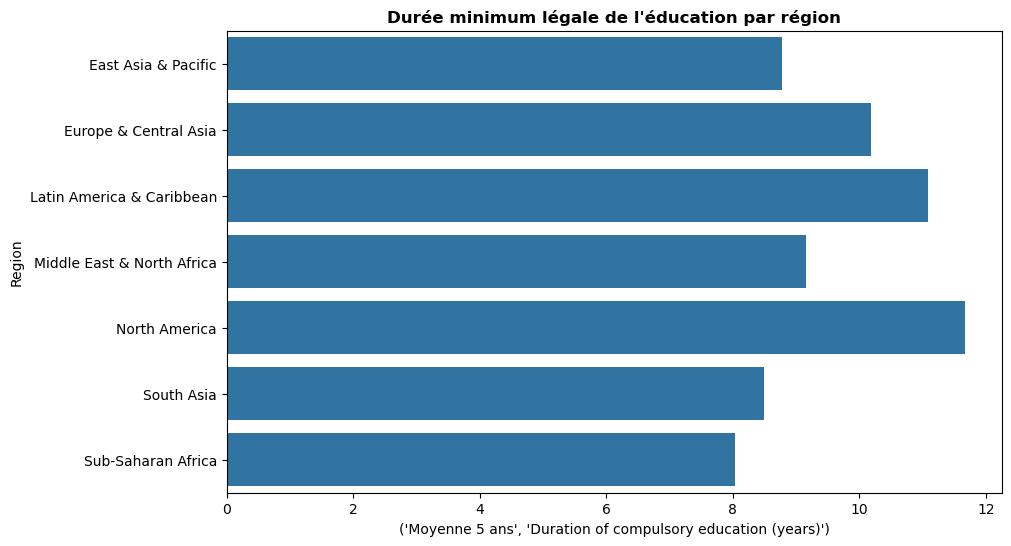

In [816]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "Duration of compulsory education (years)"])
plt.title("Durée minimum légale de l'éducation par région", fontweight="bold")

### Pourcentage d'étudiants de primaire entrant au secondaire

Text(0.5, 1.0, "Pourcentage d'étudiants entrant au secondaire par région")

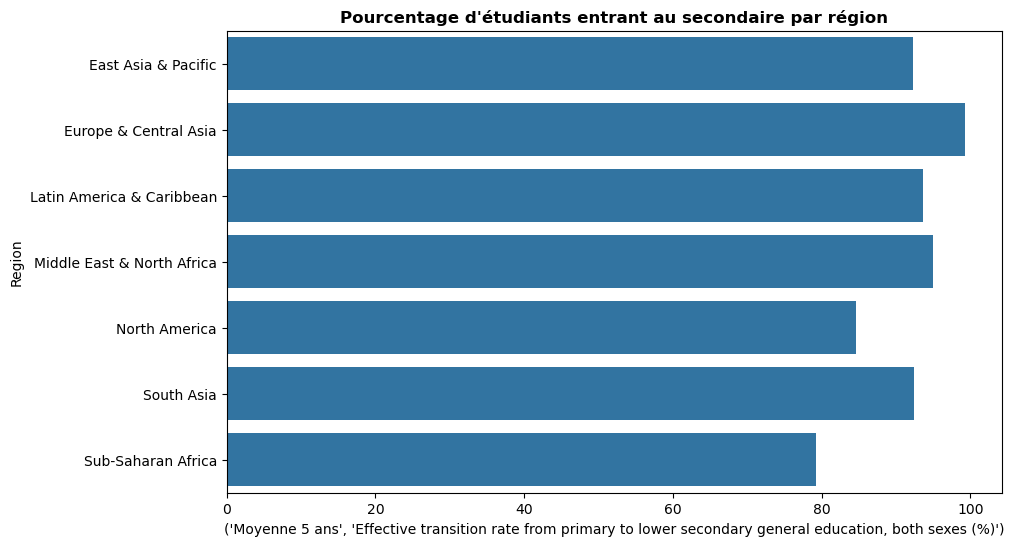

In [818]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "Effective transition rate from primary to lower secondary general education, both sexes (%)"])
plt.title("Pourcentage d'étudiants entrant au secondaire par région", fontweight="bold")

### PIB en dollars

Text(0.5, 1.0, 'PIB en dollars par région')

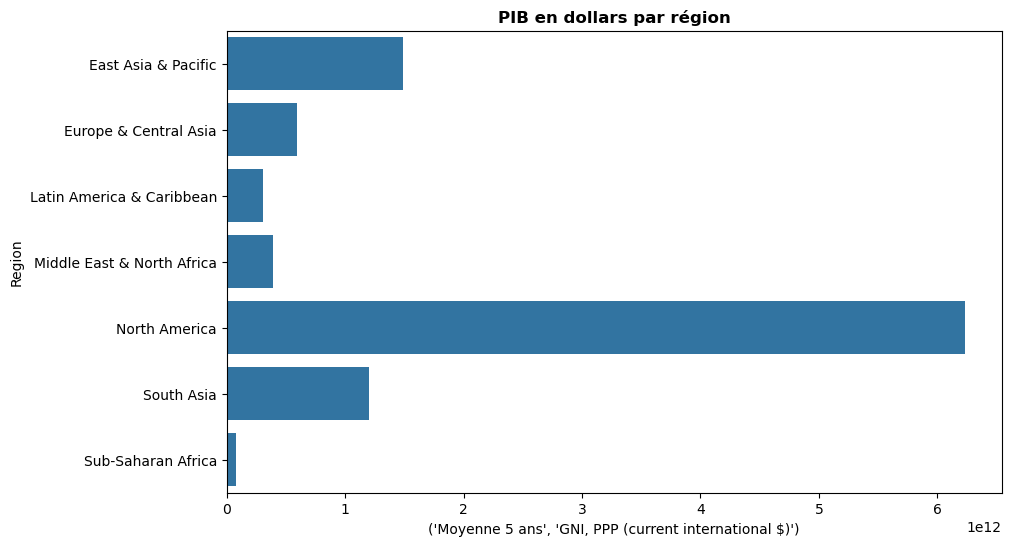

In [820]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "GNI, PPP (current international $)"])
plt.title("PIB en dollars par région", fontweight="bold")

### Pourcentage de la population concernée qui est dans le secondaire 

Text(0.5, 1.0, 'Pourcentage de la population concernée qui est dans le secondaire par région')

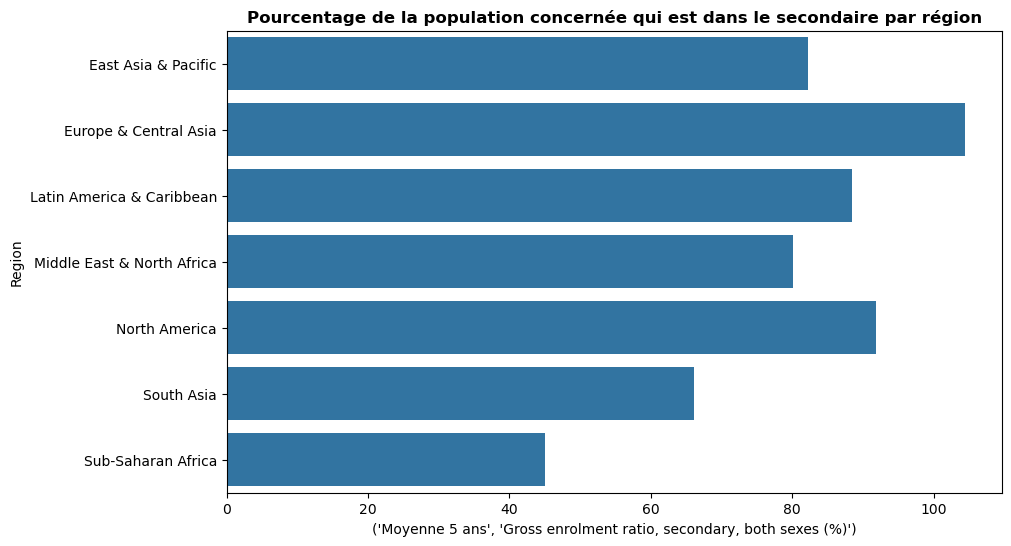

In [822]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "Gross enrolment ratio, secondary, both sexes (%)"])
plt.title("Pourcentage de la population concernée qui est dans le secondaire par région", fontweight="bold")

### Pourcentage de la population concernée qui est dans le tertiaire 

Text(0.5, 1.0, 'Pourcentage de la population concernée qui est dans le tertiaire par région')

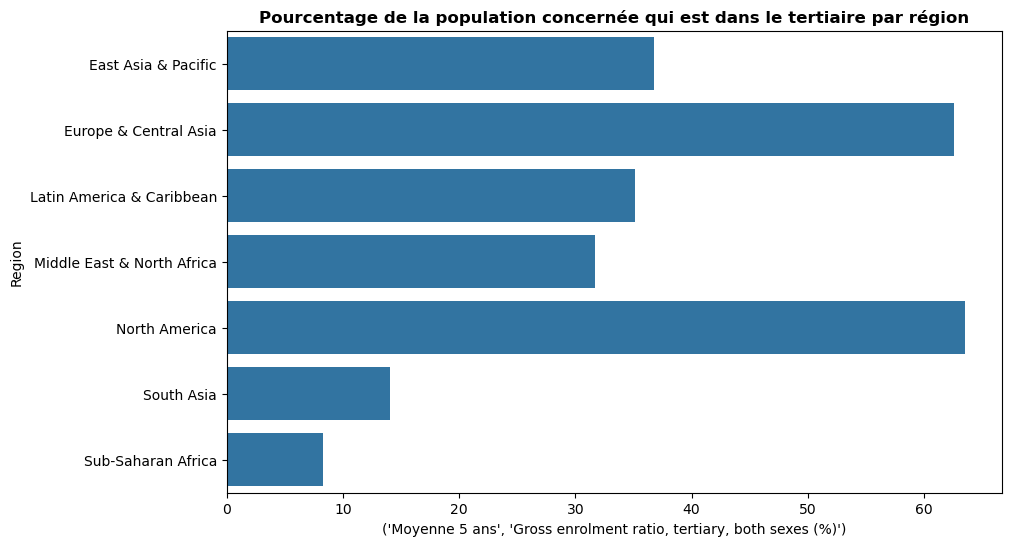

In [824]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "Gross enrolment ratio, tertiary, both sexes (%)"])
plt.title("Pourcentage de la population concernée qui est dans le tertiaire par région", fontweight="bold")

### Pourcentage de la population ayant accès à internet

Text(0.5, 1.0, 'Accès à internet par région')

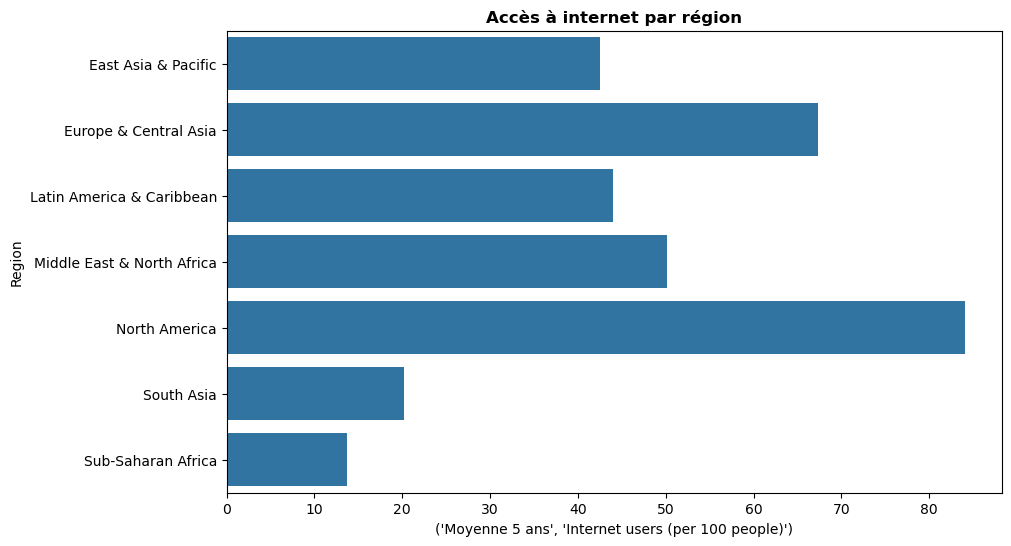

In [826]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "Internet users (per 100 people)"])
plt.title("Accès à internet par région", fontweight="bold")

### Pourcentage de la population ayant accès à un ordinateur

Text(0.5, 1.0, 'Accès à un ordinateur par région')

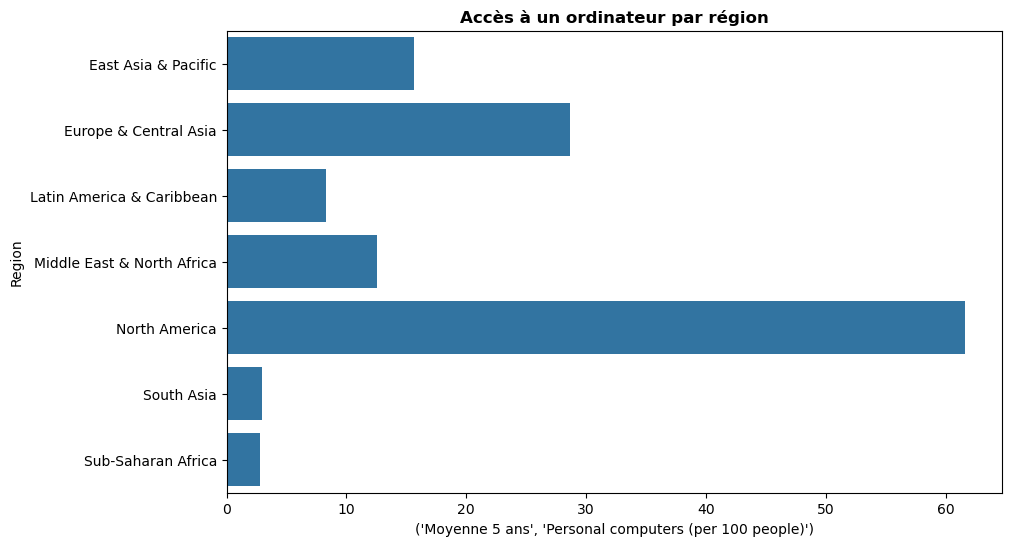

In [828]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "Personal computers (per 100 people)"])
plt.title("Accès à un ordinateur par région", fontweight="bold")

### Population des 15-24 ans

Text(0.5, 1.0, 'Population des 15-24ans par région')

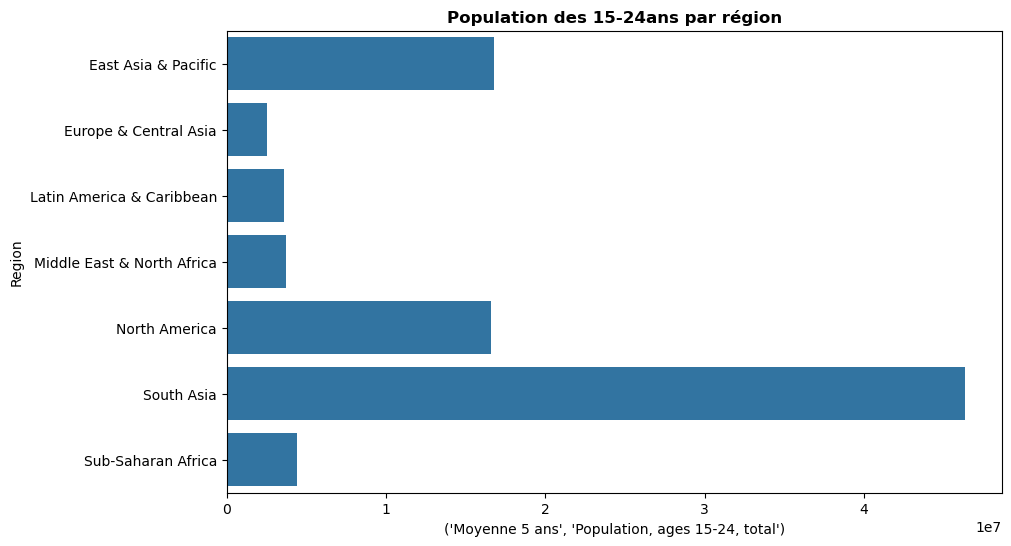

In [830]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "Population, ages 15-24, total"])
plt.title("Population des 15-24ans par région", fontweight="bold")

### Nombre d'enfants par professeur

Text(0.5, 1.0, "Nombre d'élèves par professeur par région")

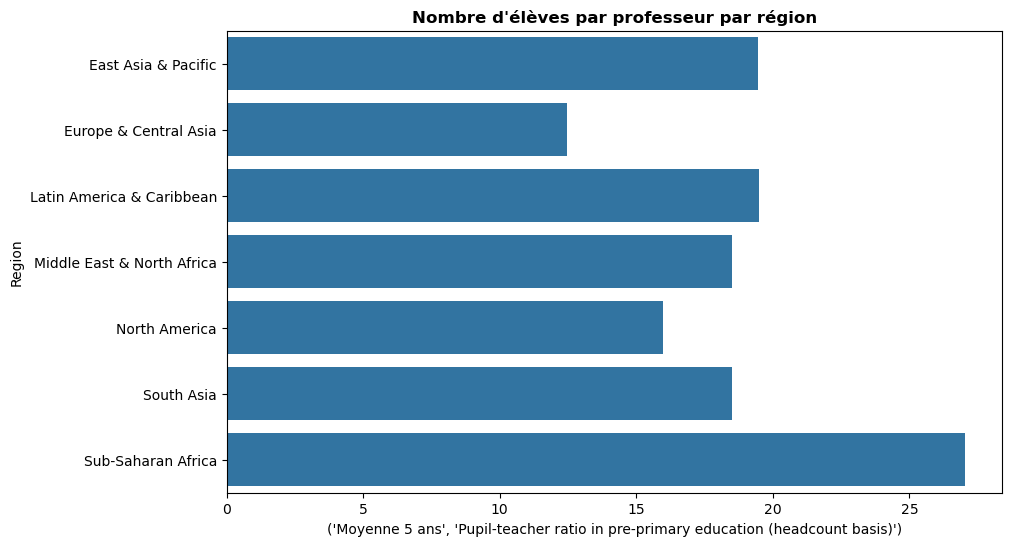

In [832]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "Pupil-teacher ratio in pre-primary education (headcount basis)"])
plt.title("Nombre d'élèves par professeur par région", fontweight="bold")

### Espérance de temps de scolarisation

Text(0.5, 1.0, 'Temps de scolarisation par région')

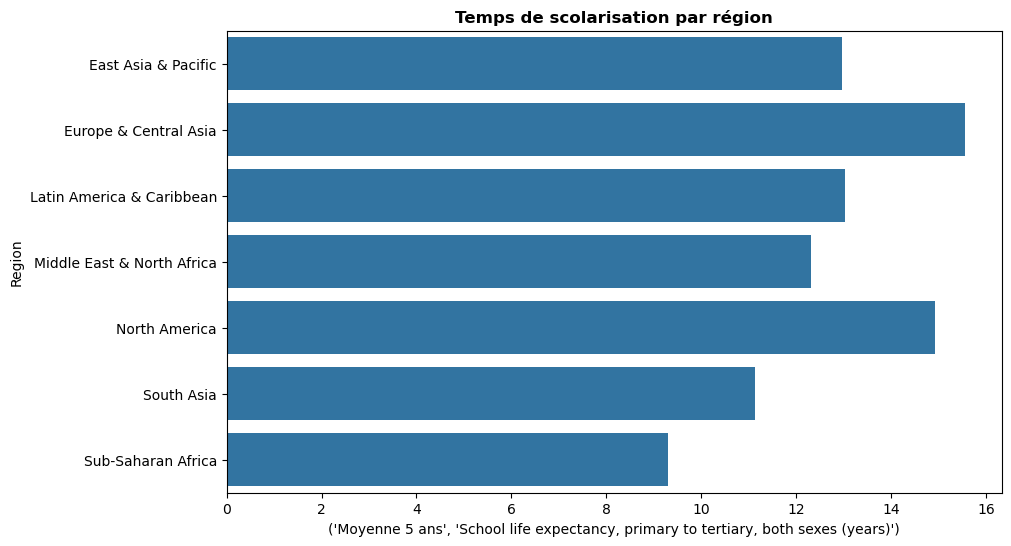

In [834]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "School life expectancy, primary to tertiary, both sexes (years)"])
plt.title("Temps de scolarisation par région", fontweight="bold")

### Taux de chomage

Text(0.5, 1.0, 'Taux de chomage par région')

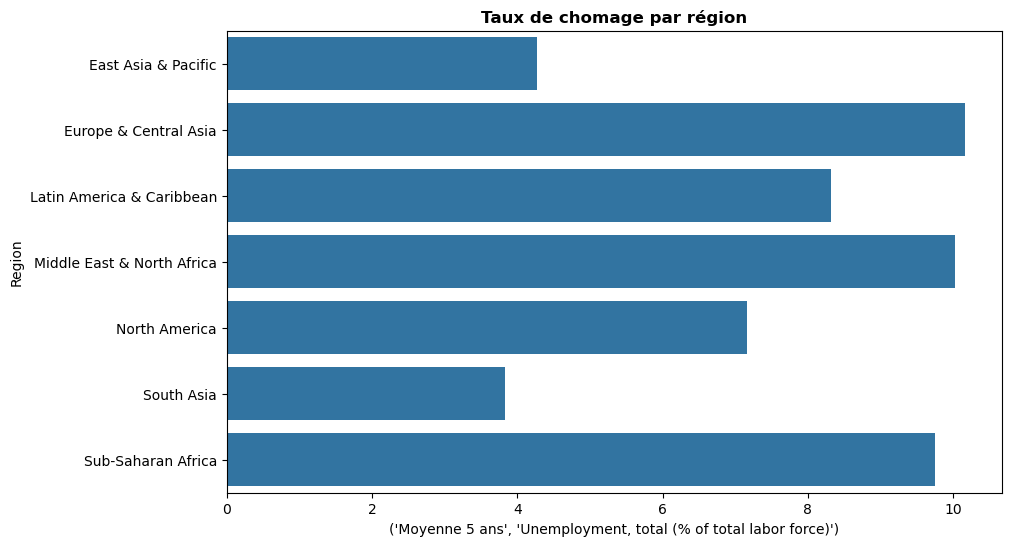

In [836]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_region["Region"], x=df_region["Moyenne 5 ans", "Unemployment, total (% of total labor force)"])
plt.title("Taux de chomage par région", fontweight="bold")

### Constatations sur les régions

3 régions semblent se dégager de cette analyse :
- L'Amérique du Nord
- L'europe
- L'asie de l'Est et Pacifique

En effet, ces 3 régions ont :
- Un PIB parmi les plus important
- Les plus fortes proportions d'étudiants admis en secondaire et tertiaire, ainsi qu'un long temps de scolarisation des étudiants
- Un accès à un ordinateur et à internet important

## Menons une analyse par Income Group des différents indicateurs

In [868]:
df_income = data.groupby("Income Group", as_index=False)["Moyenne 5 ans"].mean()

### Durée minimum légale de l'éducation

Text(0.5, 1.0, "Durée minimum légale de l'éducation par région")

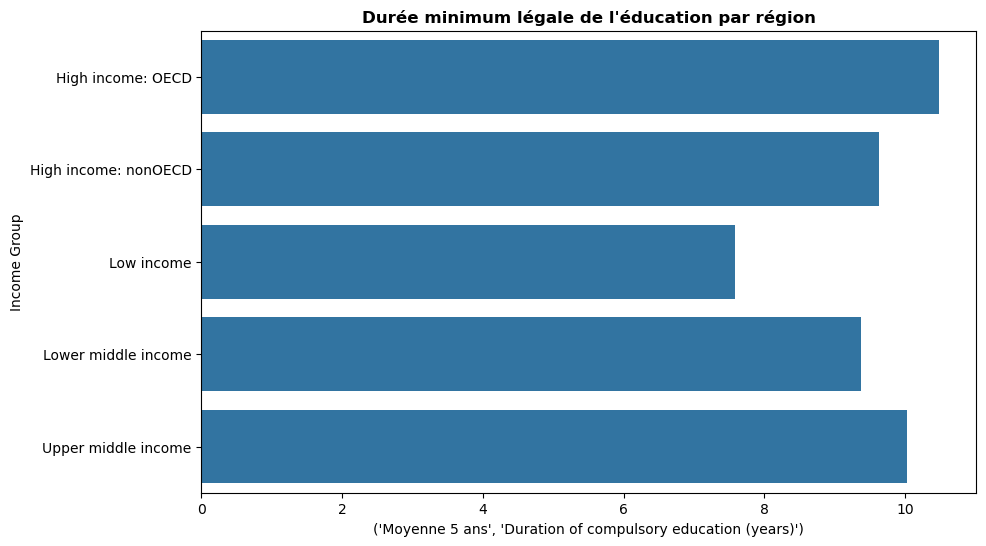

In [840]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "Duration of compulsory education (years)"])
plt.title("Durée minimum légale de l'éducation par région", fontweight="bold")

### Pourcentage d'étudiants de primaire entrant au secondaire

Text(0.5, 1.0, "Pourcentage d'étudiants entrant au secondaire par région")

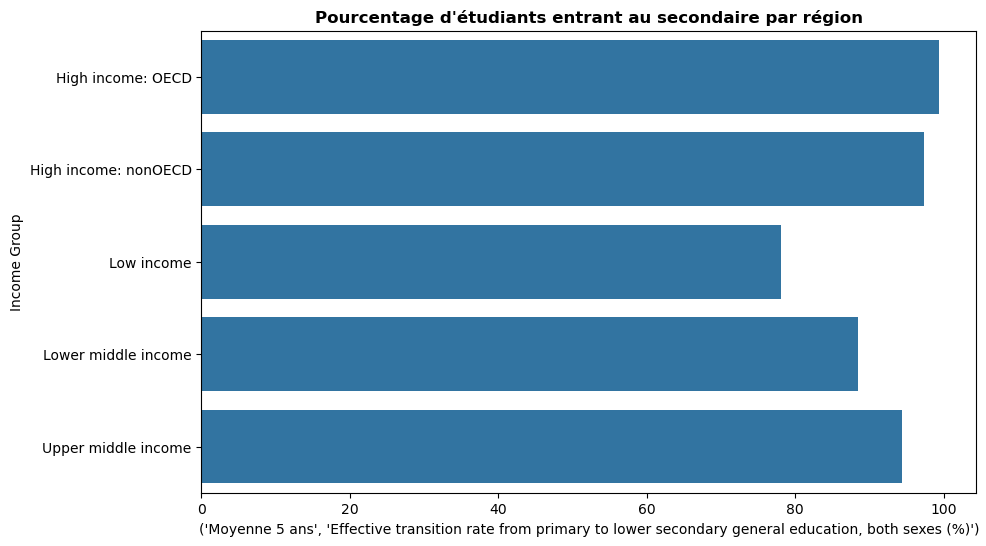

In [843]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "Effective transition rate from primary to lower secondary general education, both sexes (%)"])
plt.title("Pourcentage d'étudiants entrant au secondaire par région", fontweight="bold")

### PIB en dollars

Text(0.5, 1.0, 'PIB en dollars par région')

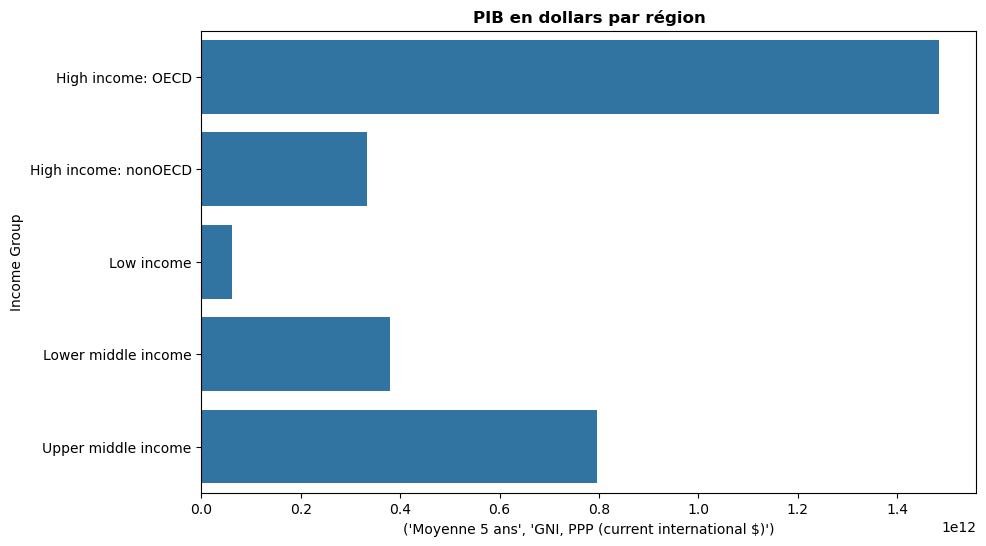

In [845]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "GNI, PPP (current international $)"])
plt.title("PIB en dollars par région", fontweight="bold")

### Pourcentage de la population concernée qui est dans le secondaire 

Text(0.5, 1.0, 'Pourcentage de la population concernée qui est dans le secondaire par région')

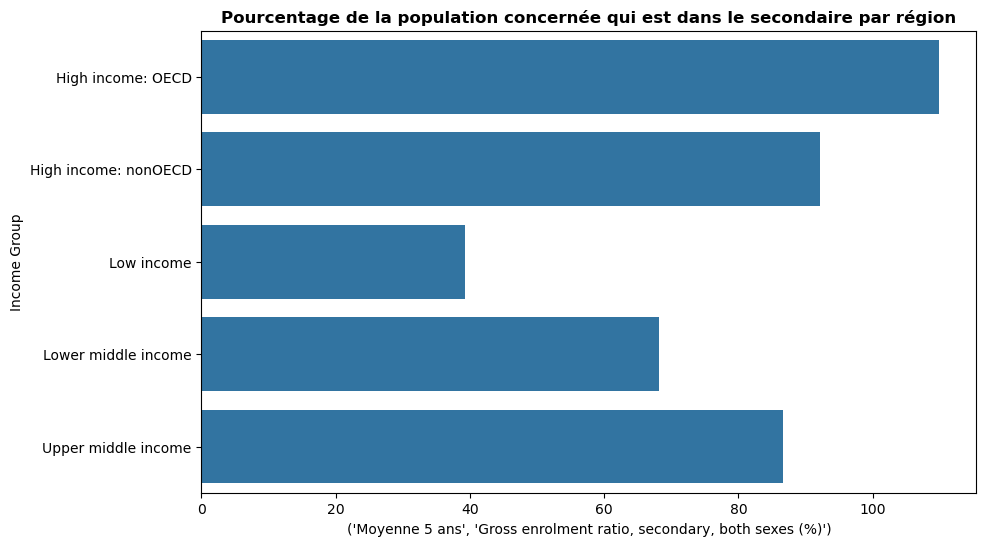

In [847]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "Gross enrolment ratio, secondary, both sexes (%)"])
plt.title("Pourcentage de la population concernée qui est dans le secondaire par région", fontweight="bold")

### Pourcentage de la population concernée qui est dans le tertiaire 

Text(0.5, 1.0, 'Pourcentage de la population concernée qui est dans le tertiaire par région')

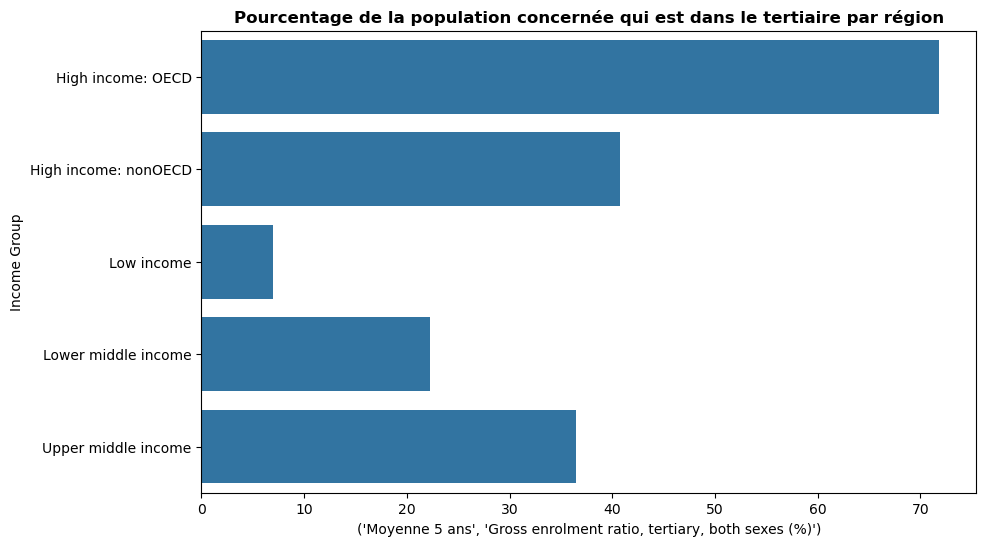

In [849]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "Gross enrolment ratio, tertiary, both sexes (%)"])
plt.title("Pourcentage de la population concernée qui est dans le tertiaire par région", fontweight="bold")

### Pourcentage de la population ayant accès à internet

Text(0.5, 1.0, 'Accès à internet par région')

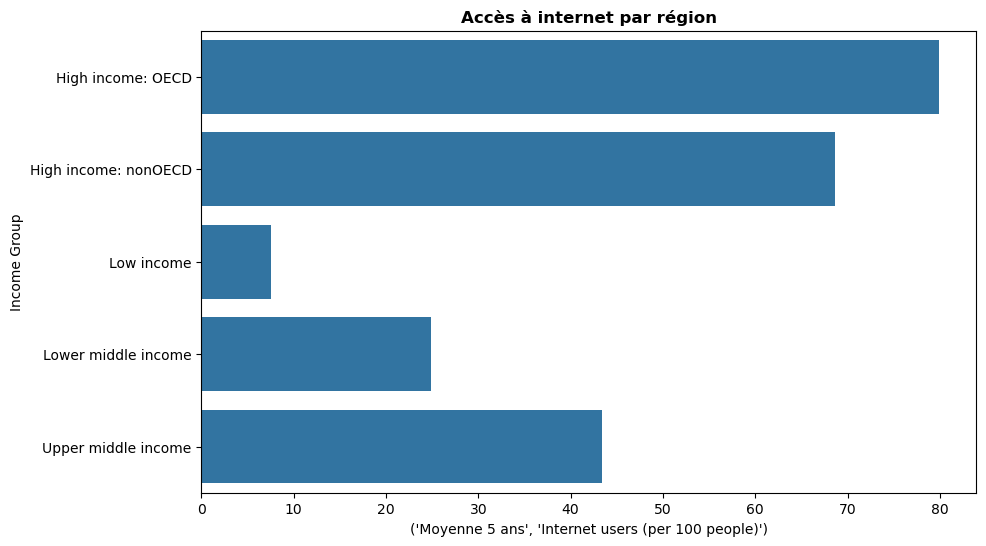

In [853]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "Internet users (per 100 people)"])
plt.title("Accès à internet par région", fontweight="bold")

### Pourcentage de la population ayant accès à un ordinateur

Text(0.5, 1.0, 'Accès à un ordinateur par région')

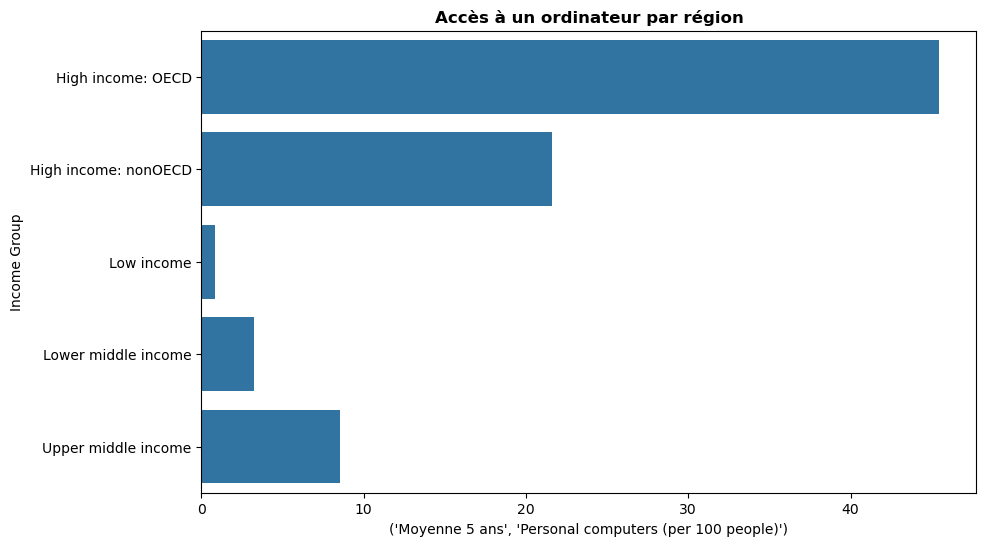

In [855]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "Personal computers (per 100 people)"])
plt.title("Accès à un ordinateur par région", fontweight="bold")

### Population des 15-24 ans

Text(0.5, 1.0, 'Population des 15-24ans par région')

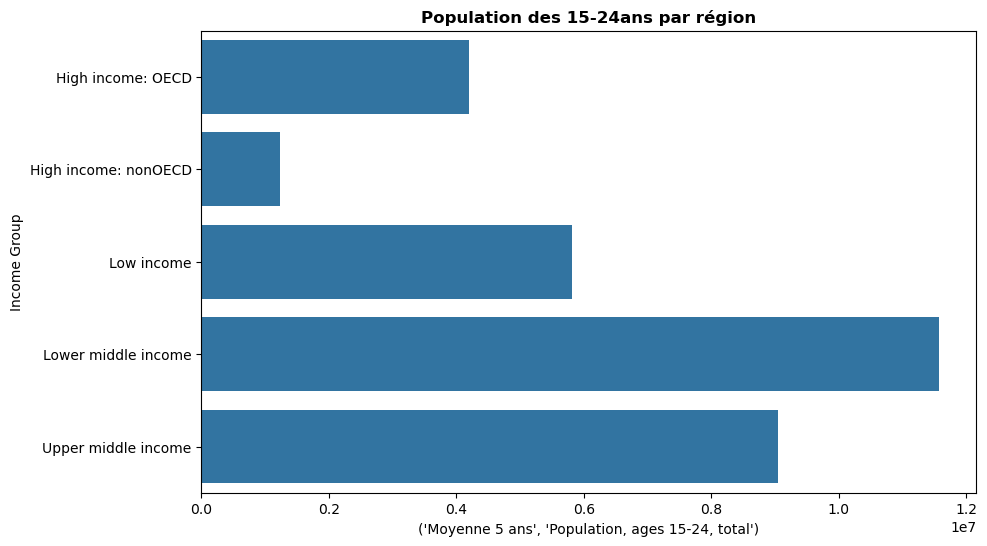

In [857]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "Population, ages 15-24, total"])
plt.title("Population des 15-24ans par région", fontweight="bold")

### Nombre d'enfants par professeur

Text(0.5, 1.0, "Nombre d'élèves par professeur par région")

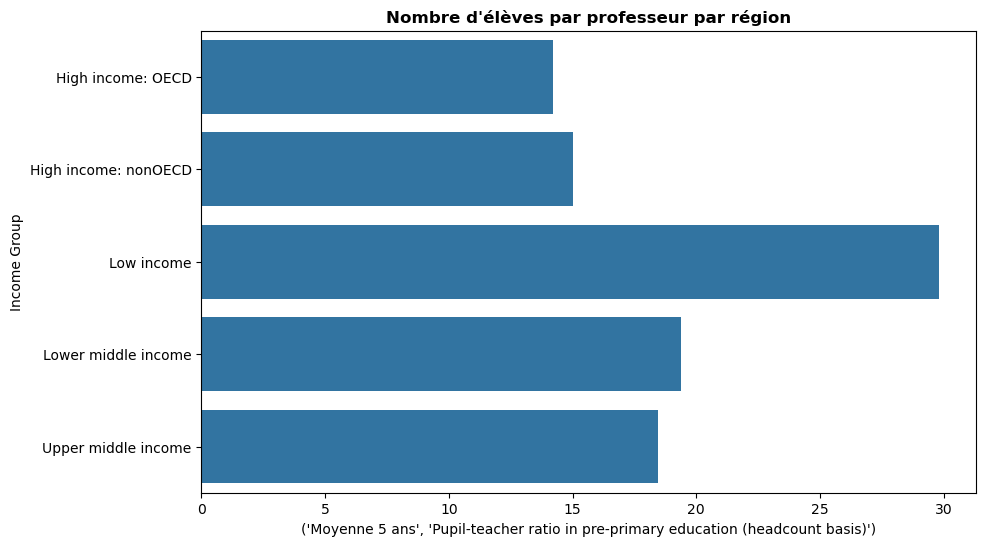

In [859]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "Pupil-teacher ratio in pre-primary education (headcount basis)"])
plt.title("Nombre d'élèves par professeur par région", fontweight="bold")

### Espérance de temps de scolarisation

Text(0.5, 1.0, 'Temps de scolarisation par région')

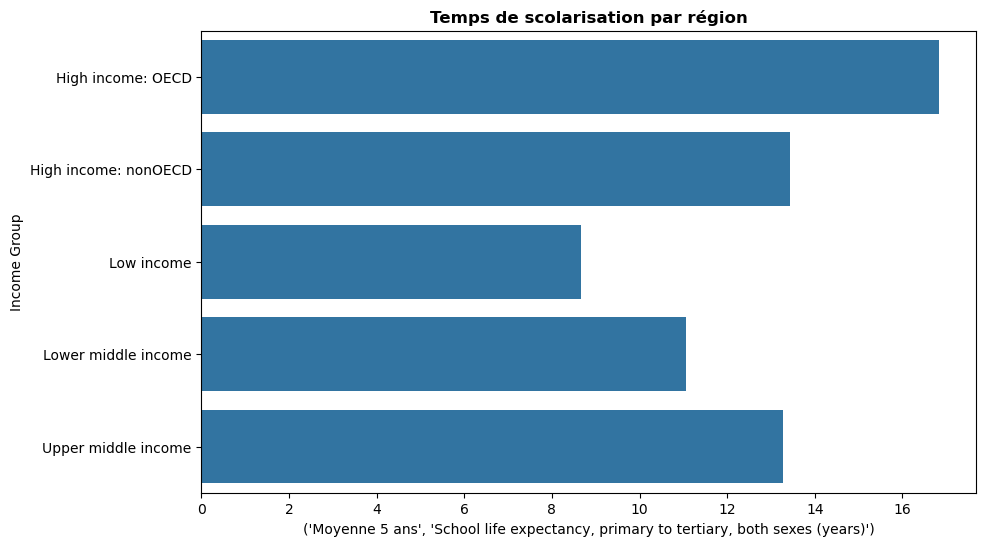

In [861]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "School life expectancy, primary to tertiary, both sexes (years)"])
plt.title("Temps de scolarisation par région", fontweight="bold")

### Taux de chomage

Text(0.5, 1.0, 'Taux de chomage par région')

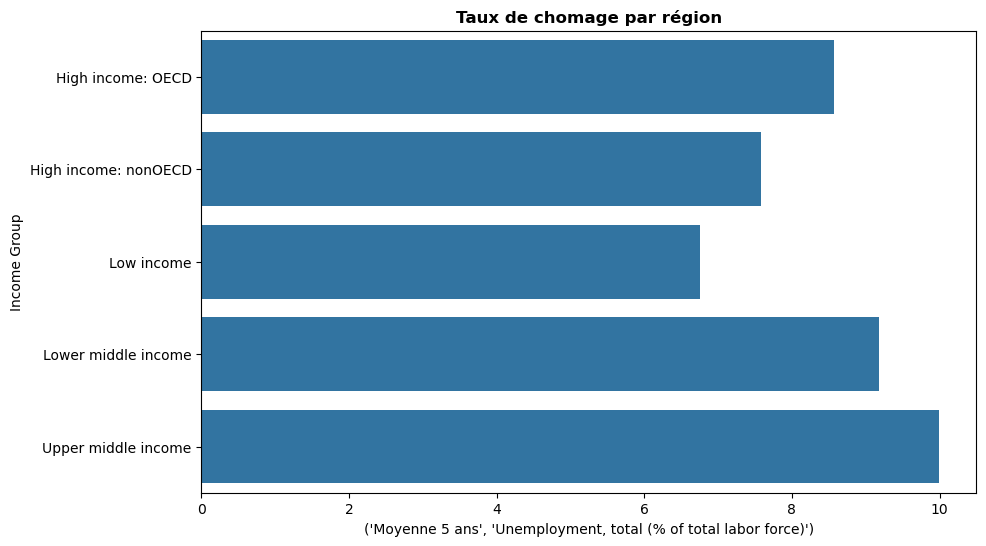

In [863]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_income["Income Group"], x=df_income["Moyenne 5 ans", "Unemployment, total (% of total labor force)"])
plt.title("Taux de chomage par région", fontweight="bold")

### Constatations sur les groupes de revenus

Ici aussi les groupes suivants se détachent du lot :
- High income: OECD
- High income: nonOECD
- Upper middle income

Les raisons sont similaires aux constats faits sur les régions.

## Etudions les relations entre nos indicateurs

Pour cela, nous allons tracer des scatters plots des différents indicateurs entre eux

Rappel de nos indicateurs :
- Duration of compulsory education (years)
- Effective transition rate from primary to lower secondary general education, both sexes (%)
- GNI, PPP (current international $)
- Gross enrolment ratio, secondary, both sexes (%)
- Gross enrolment ratio, tertiary, both sexes (%)
- Internet users (per 100 people)
- Personal computers (per 100 people)
- Population, ages 15-24, total
- Pupil-teacher ratio in pre-primary education (headcount basis)
- School life expectancy, primary to tertiary, both sexes (years)
- Unemployment, total (% of total labor force)

### Duration of compulsory education (years)

<Axes: xlabel='Effective transition rate from primary to lower secondary general education, both sexes (%)', ylabel='Duration of compulsory education (years)'>

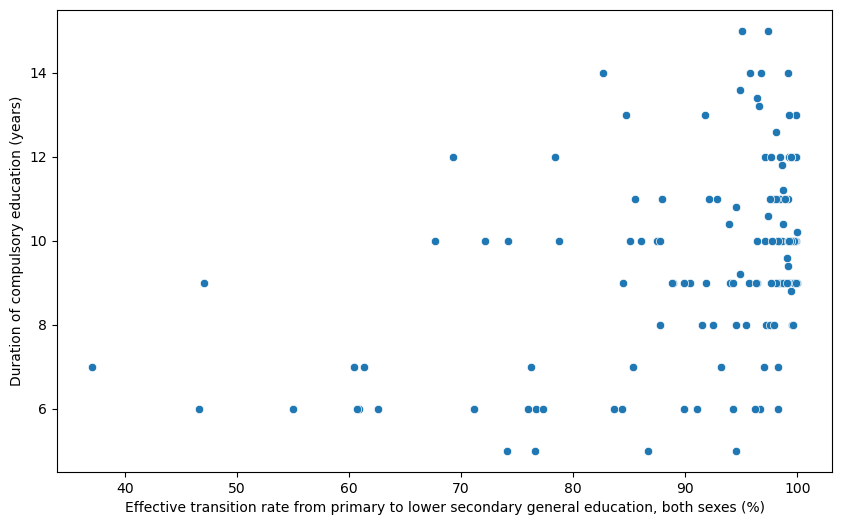

In [886]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Duration of compulsory education (years)", 
    x="Effective transition rate from primary to lower secondary general education, both sexes (%)")

<Axes: xlabel='GNI, PPP (current international $)', ylabel='Duration of compulsory education (years)'>

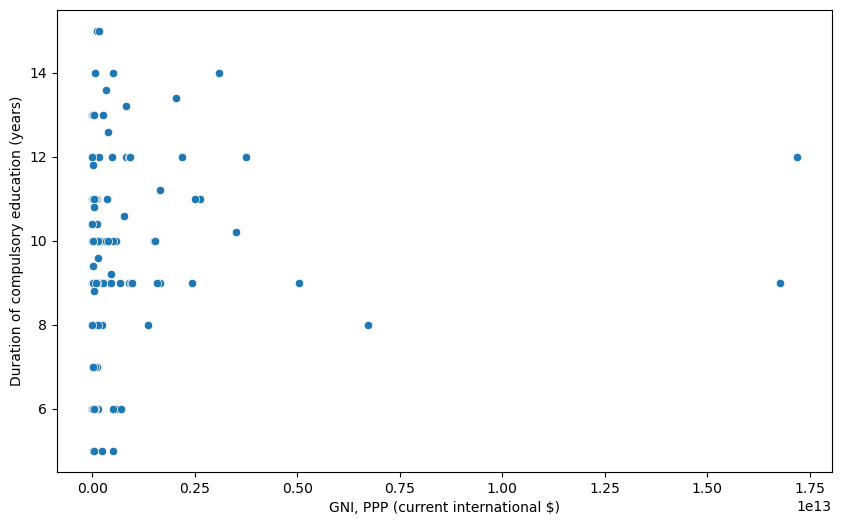

In [888]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Duration of compulsory education (years)", 
    x="GNI, PPP (current international $)")

<Axes: xlabel='Gross enrolment ratio, secondary, both sexes (%)', ylabel='Duration of compulsory education (years)'>

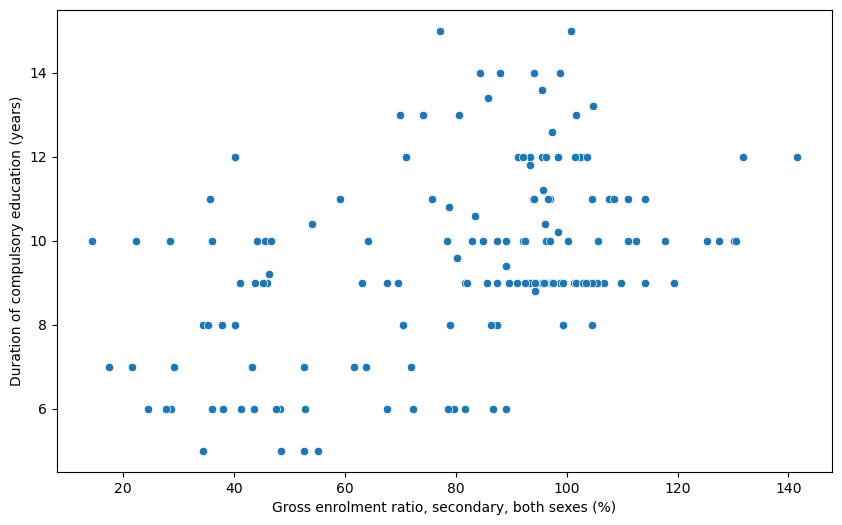

In [890]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Duration of compulsory education (years)", 
    x="Gross enrolment ratio, secondary, both sexes (%)")

<Axes: xlabel='Gross enrolment ratio, tertiary, both sexes (%)', ylabel='Duration of compulsory education (years)'>

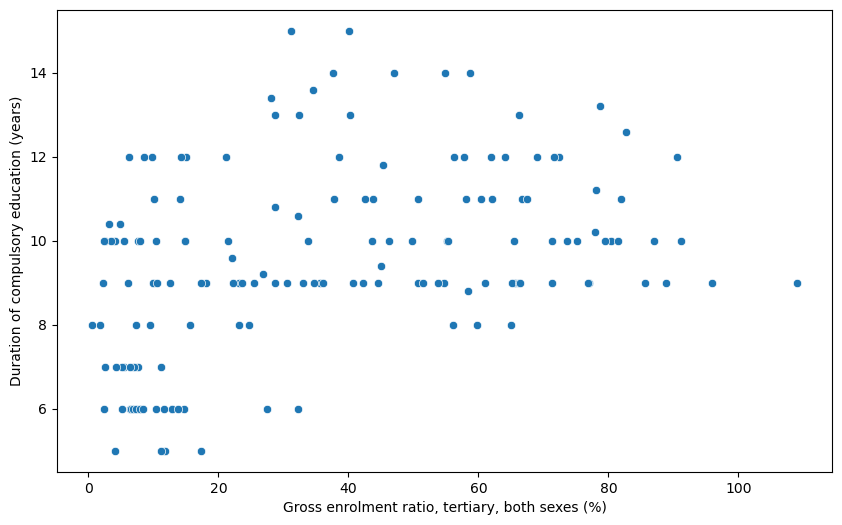

In [892]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Duration of compulsory education (years)", 
    x="Gross enrolment ratio, tertiary, both sexes (%)")

<Axes: xlabel='Internet users (per 100 people)', ylabel='Duration of compulsory education (years)'>

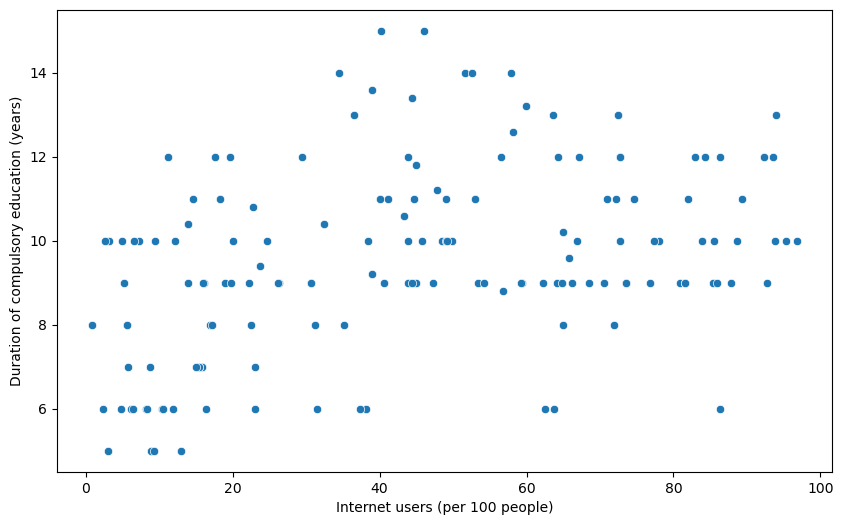

In [894]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Duration of compulsory education (years)", 
    x="Internet users (per 100 people)")

<Axes: xlabel='Personal computers (per 100 people)', ylabel='Duration of compulsory education (years)'>

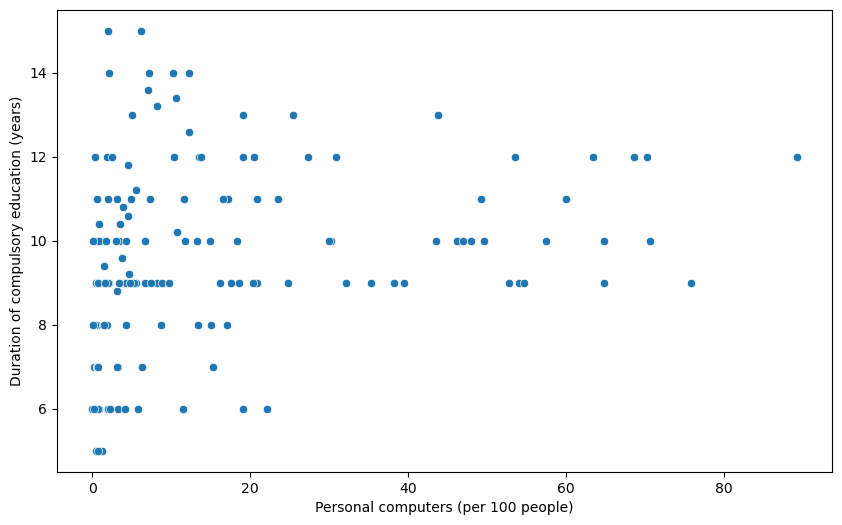

In [896]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Duration of compulsory education (years)", 
    x="Personal computers (per 100 people)")

<Axes: xlabel='Population, ages 15-24, total', ylabel='Duration of compulsory education (years)'>

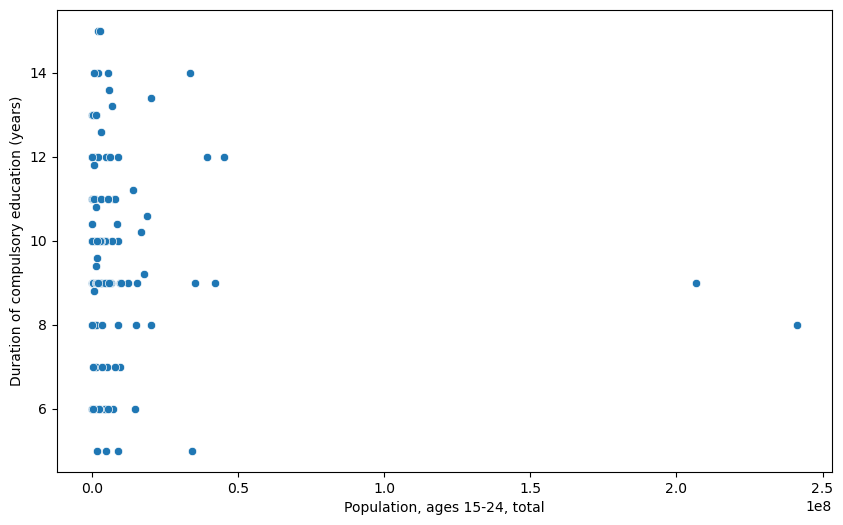

In [898]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Duration of compulsory education (years)", 
    x="Population, ages 15-24, total")

<Axes: xlabel='Pupil-teacher ratio in pre-primary education (headcount basis)', ylabel='Duration of compulsory education (years)'>

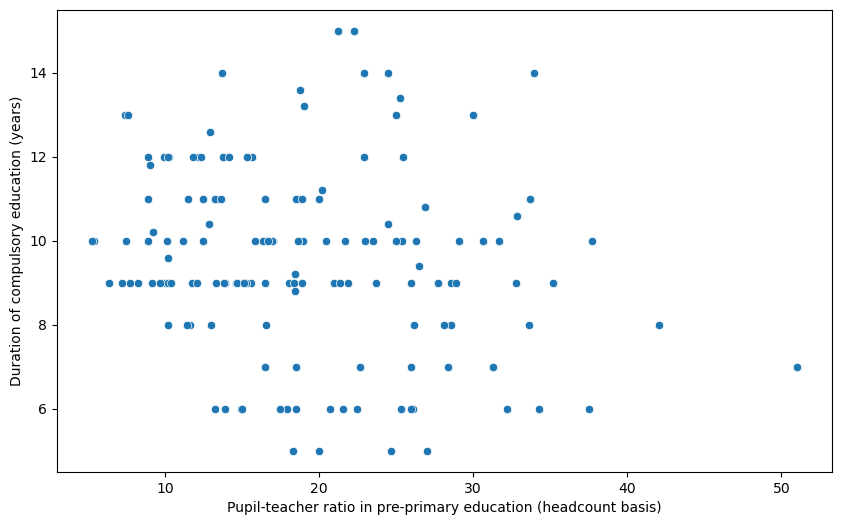

In [900]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Duration of compulsory education (years)", 
    x="Pupil-teacher ratio in pre-primary education (headcount basis)")

<Axes: xlabel='School life expectancy, primary to tertiary, both sexes (years)', ylabel='Duration of compulsory education (years)'>

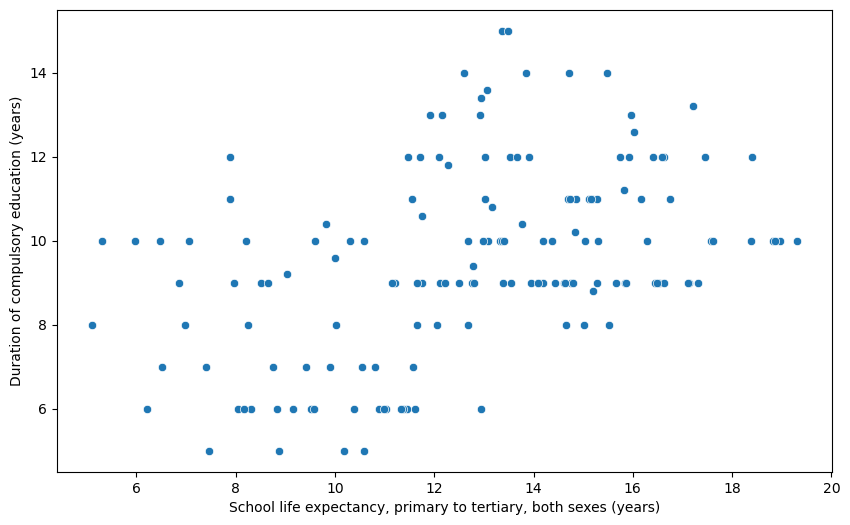

In [902]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Duration of compulsory education (years)", 
    x="School life expectancy, primary to tertiary, both sexes (years)")

<Axes: xlabel='Unemployment, total (% of total labor force)', ylabel='Duration of compulsory education (years)'>

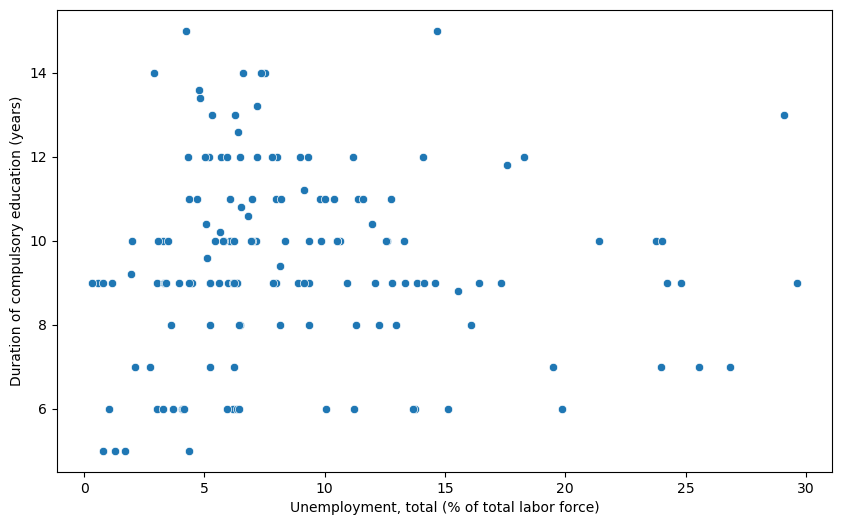

In [904]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Duration of compulsory education (years)", 
    x="Unemployment, total (% of total labor force)")

### Effective transition rate from primary to lower secondary general education, both sexes (%)

<Axes: xlabel='GNI, PPP (current international $)', ylabel='Effective transition rate from primary to lower secondary general education, both sexes (%)'>

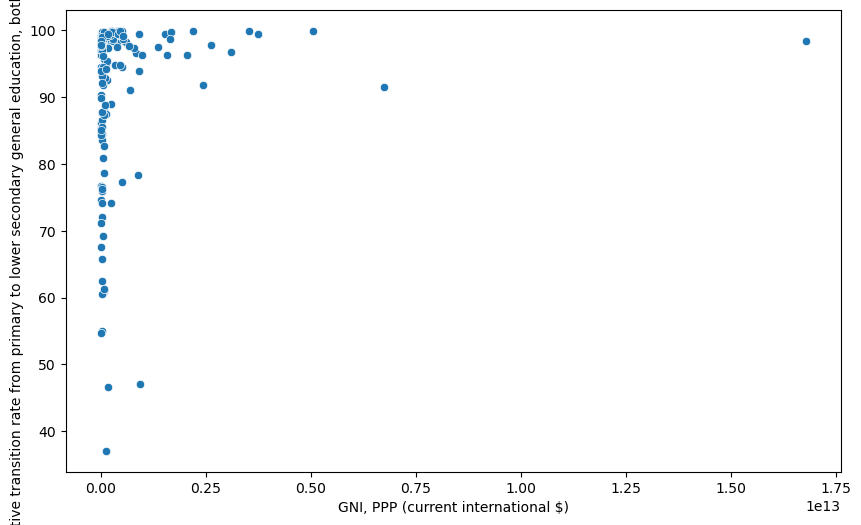

In [906]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Effective transition rate from primary to lower secondary general education, both sexes (%)", 
    x="GNI, PPP (current international $)")

<Axes: xlabel='Gross enrolment ratio, secondary, both sexes (%)', ylabel='Effective transition rate from primary to lower secondary general education, both sexes (%)'>

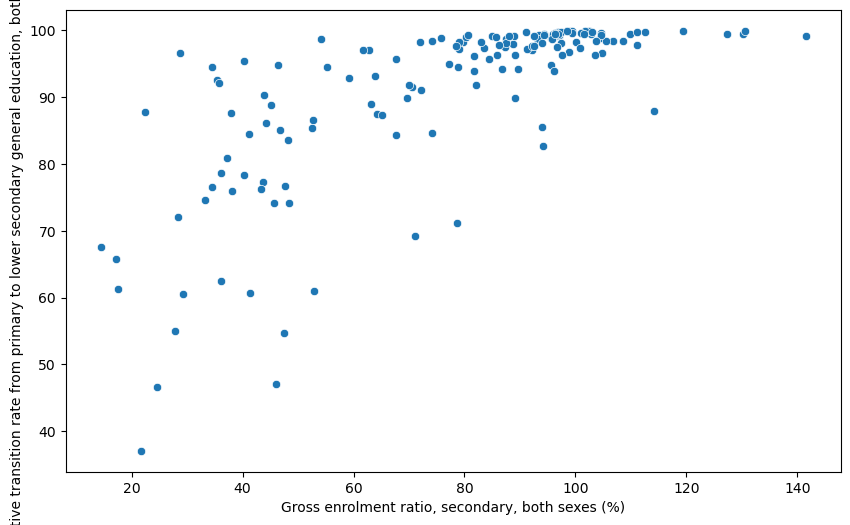

In [908]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Effective transition rate from primary to lower secondary general education, both sexes (%)", 
    x="Gross enrolment ratio, secondary, both sexes (%)")

<Axes: xlabel='Gross enrolment ratio, tertiary, both sexes (%)', ylabel='Effective transition rate from primary to lower secondary general education, both sexes (%)'>

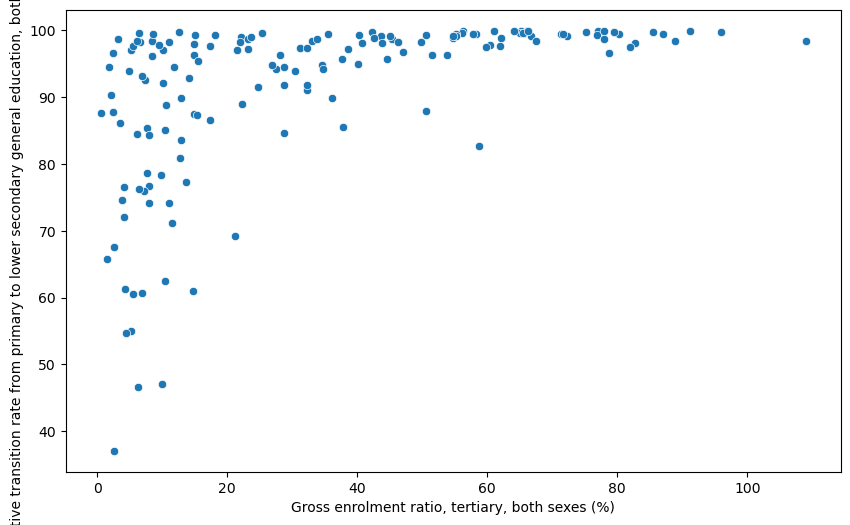

In [910]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Effective transition rate from primary to lower secondary general education, both sexes (%)", 
    x="Gross enrolment ratio, tertiary, both sexes (%)")

<Axes: xlabel='Internet users (per 100 people)', ylabel='Effective transition rate from primary to lower secondary general education, both sexes (%)'>

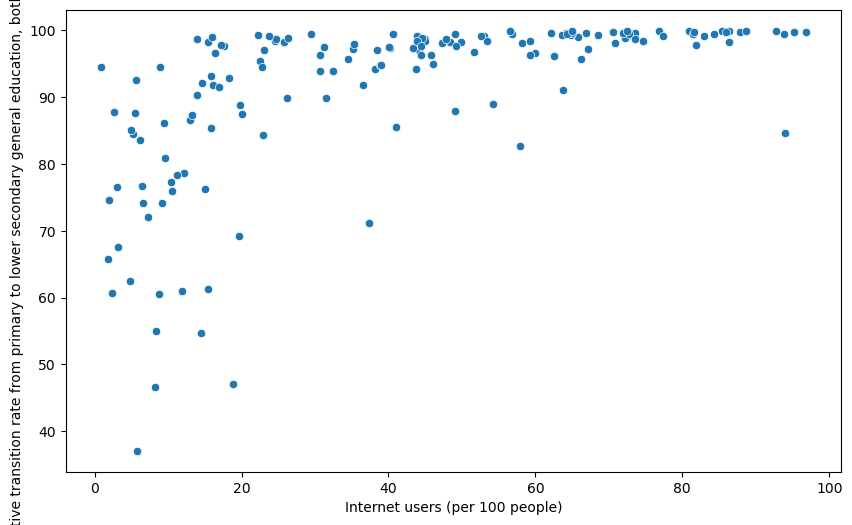

In [912]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Effective transition rate from primary to lower secondary general education, both sexes (%)", 
    x="Internet users (per 100 people)")

<Axes: xlabel='Personal computers (per 100 people)', ylabel='Effective transition rate from primary to lower secondary general education, both sexes (%)'>

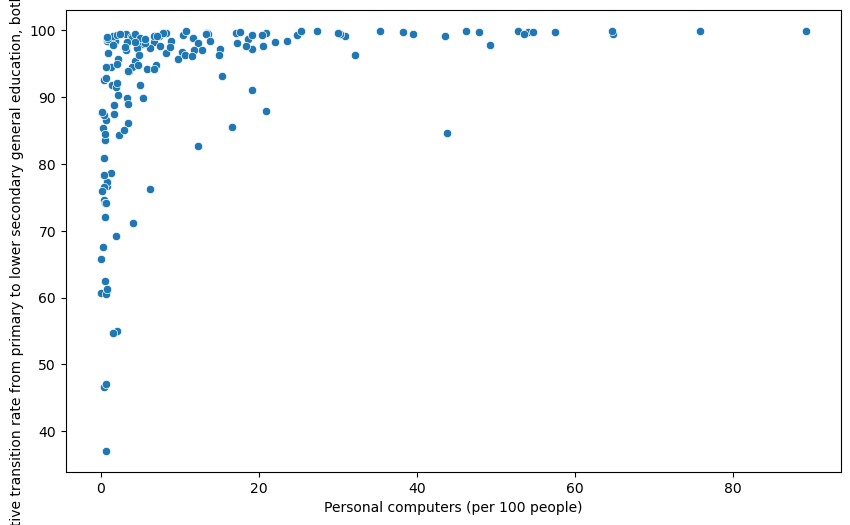

In [914]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Effective transition rate from primary to lower secondary general education, both sexes (%)", 
    x="Personal computers (per 100 people)")

<Axes: xlabel='Population, ages 15-24, total', ylabel='Effective transition rate from primary to lower secondary general education, both sexes (%)'>

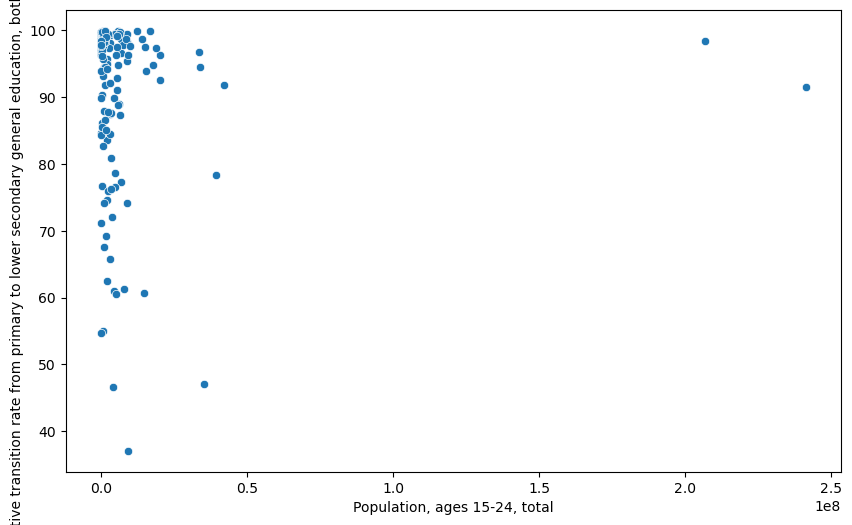

In [916]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Effective transition rate from primary to lower secondary general education, both sexes (%)", 
    x="Population, ages 15-24, total")

<Axes: xlabel='Pupil-teacher ratio in pre-primary education (headcount basis)', ylabel='Effective transition rate from primary to lower secondary general education, both sexes (%)'>

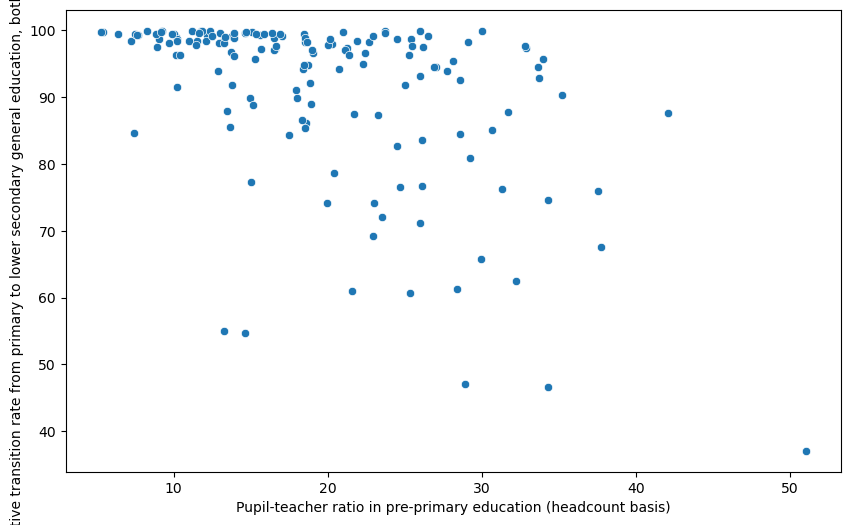

In [918]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Effective transition rate from primary to lower secondary general education, both sexes (%)", 
    x="Pupil-teacher ratio in pre-primary education (headcount basis)")

<Axes: xlabel='School life expectancy, primary to tertiary, both sexes (years)', ylabel='Effective transition rate from primary to lower secondary general education, both sexes (%)'>

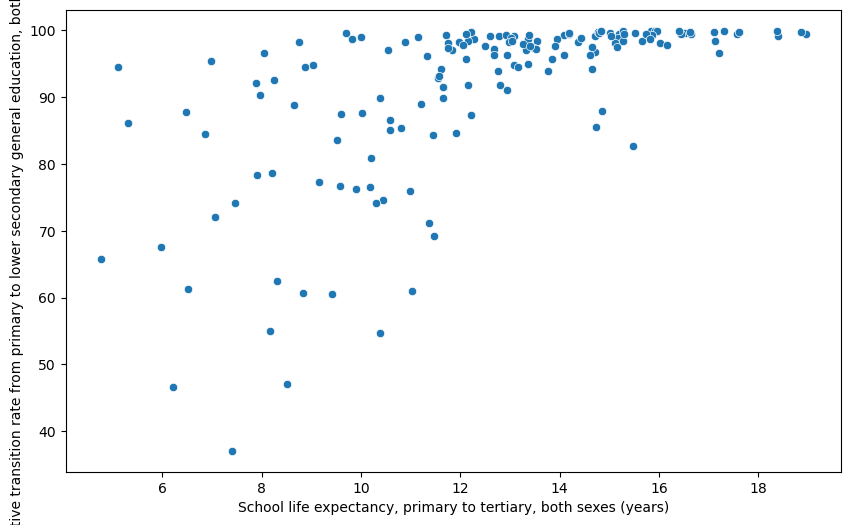

In [920]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Effective transition rate from primary to lower secondary general education, both sexes (%)", 
    x="School life expectancy, primary to tertiary, both sexes (years)")

<Axes: xlabel='Unemployment, total (% of total labor force)', ylabel='Effective transition rate from primary to lower secondary general education, both sexes (%)'>

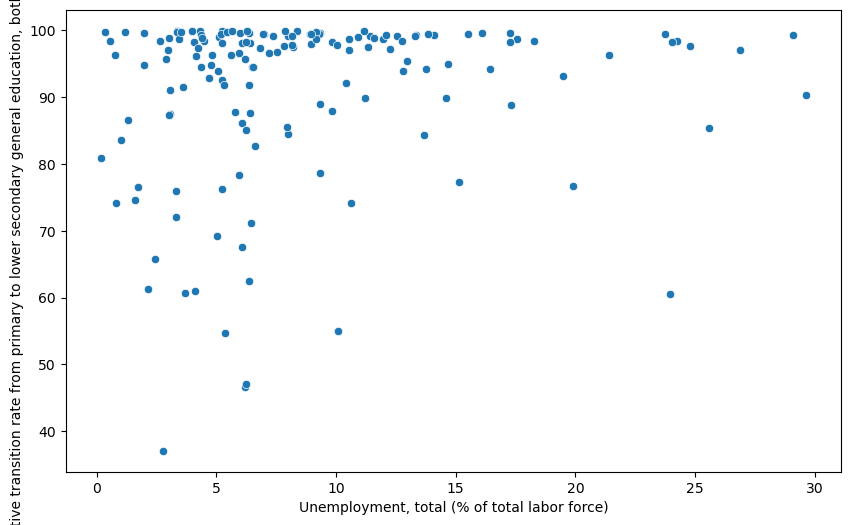

In [922]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Effective transition rate from primary to lower secondary general education, both sexes (%)", 
    x="Unemployment, total (% of total labor force)")

### GNI, PPP (current international $)

<Axes: xlabel='Gross enrolment ratio, secondary, both sexes (%)', ylabel='GNI, PPP (current international $)'>

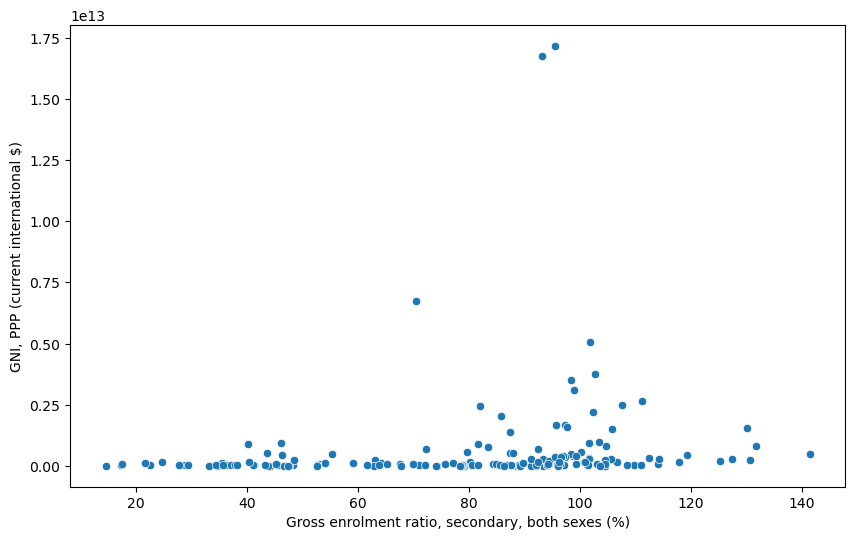

In [926]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="GNI, PPP (current international $)", 
    x="Gross enrolment ratio, secondary, both sexes (%)")

<Axes: xlabel='Gross enrolment ratio, tertiary, both sexes (%)', ylabel='GNI, PPP (current international $)'>

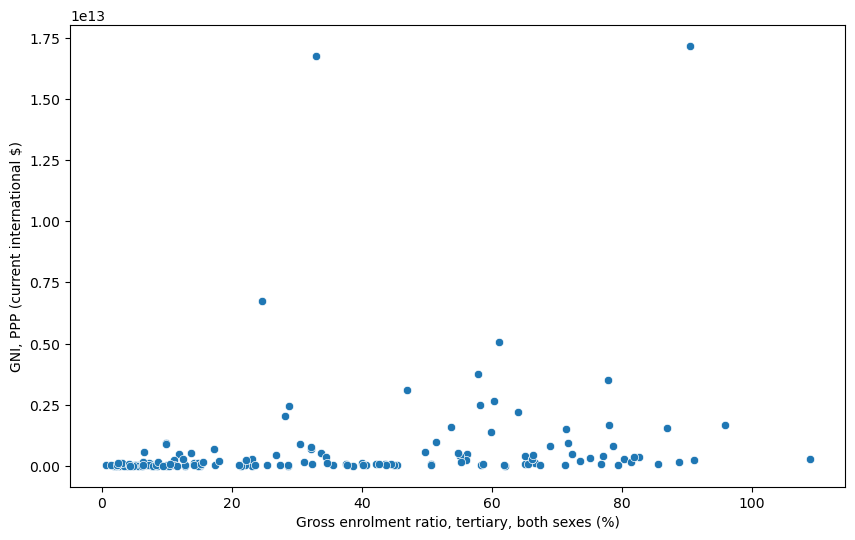

In [928]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="GNI, PPP (current international $)", 
    x="Gross enrolment ratio, tertiary, both sexes (%)")

<Axes: xlabel='Internet users (per 100 people)', ylabel='GNI, PPP (current international $)'>

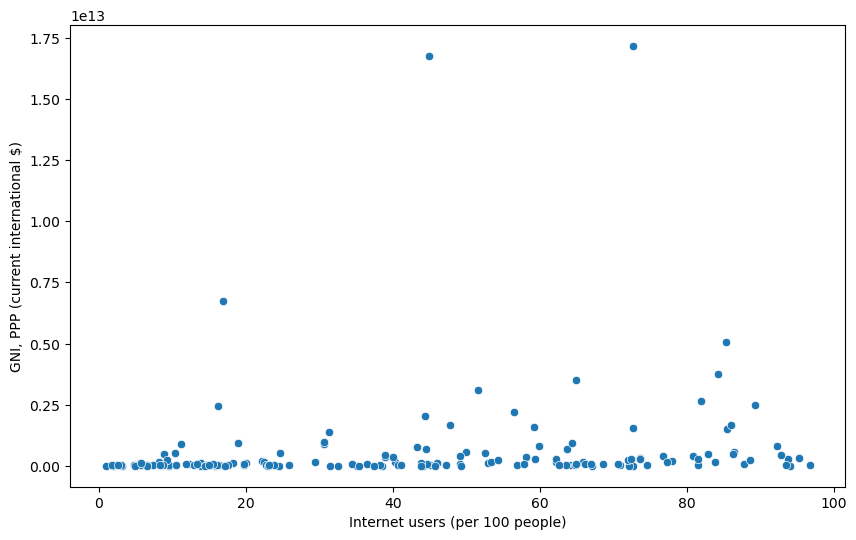

In [930]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="GNI, PPP (current international $)", 
    x="Internet users (per 100 people)")

<Axes: xlabel='Personal computers (per 100 people)', ylabel='GNI, PPP (current international $)'>

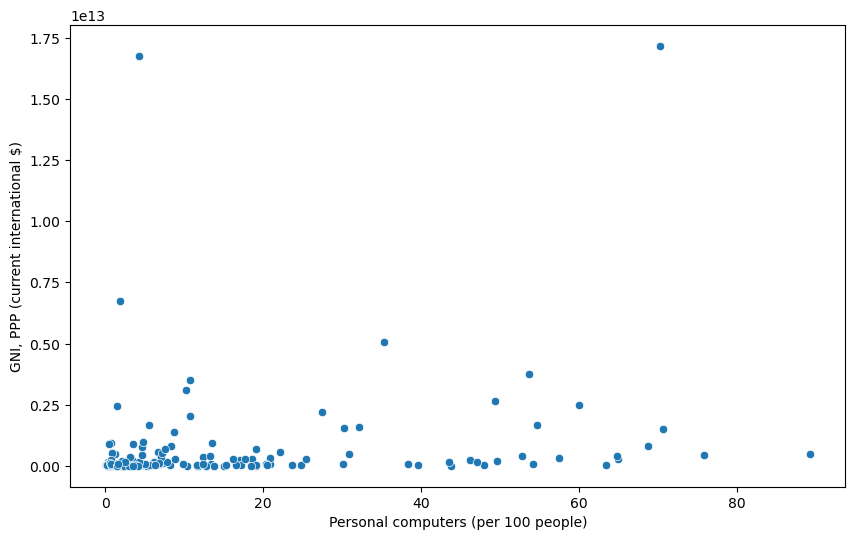

In [932]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="GNI, PPP (current international $)", 
    x="Personal computers (per 100 people)")

<Axes: xlabel='Population, ages 15-24, total', ylabel='GNI, PPP (current international $)'>

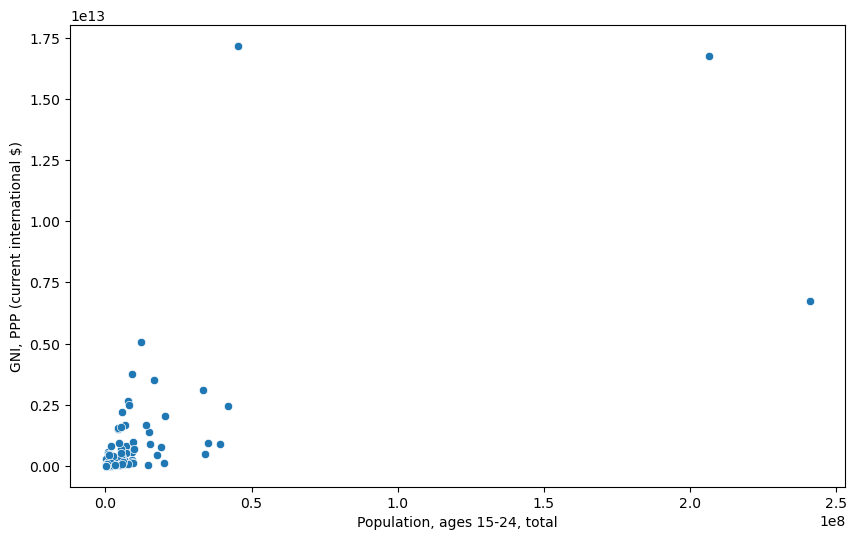

In [934]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="GNI, PPP (current international $)", 
    x="Population, ages 15-24, total")

<Axes: xlabel='Pupil-teacher ratio in pre-primary education (headcount basis)', ylabel='GNI, PPP (current international $)'>

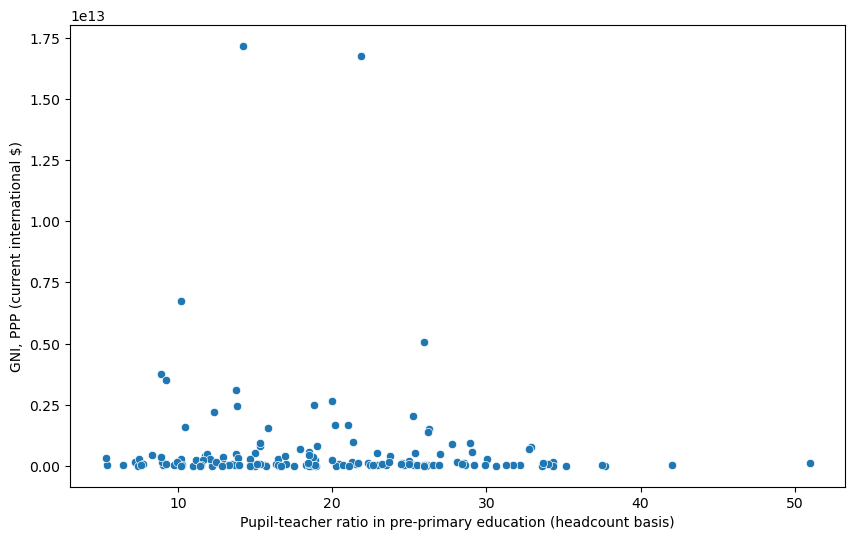

In [936]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="GNI, PPP (current international $)", 
    x="Pupil-teacher ratio in pre-primary education (headcount basis)")

<Axes: xlabel='School life expectancy, primary to tertiary, both sexes (years)', ylabel='GNI, PPP (current international $)'>

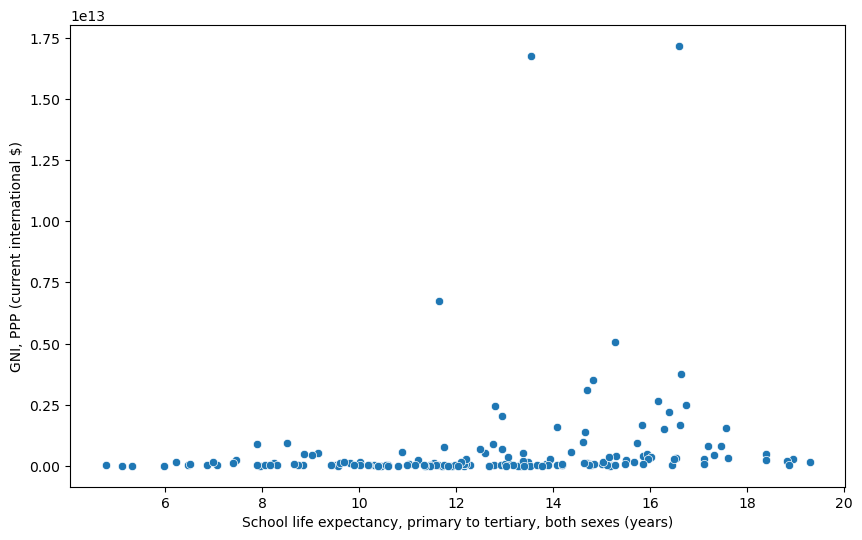

In [938]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="GNI, PPP (current international $)", 
    x="School life expectancy, primary to tertiary, both sexes (years)")

<Axes: xlabel='Unemployment, total (% of total labor force)', ylabel='GNI, PPP (current international $)'>

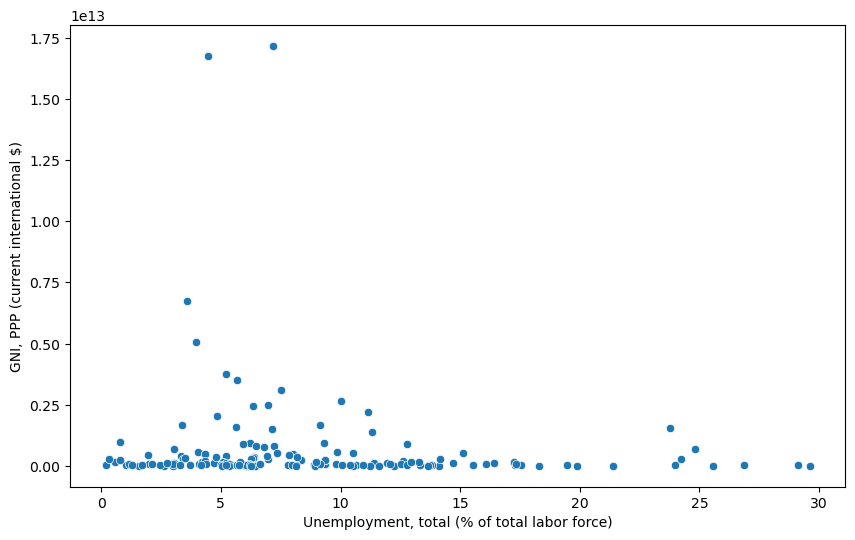

In [940]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="GNI, PPP (current international $)", 
    x="Unemployment, total (% of total labor force)")

### Gross enrolment ratio, secondary, both sexes (%)

<Axes: xlabel='Gross enrolment ratio, tertiary, both sexes (%)', ylabel='Gross enrolment ratio, secondary, both sexes (%)'>

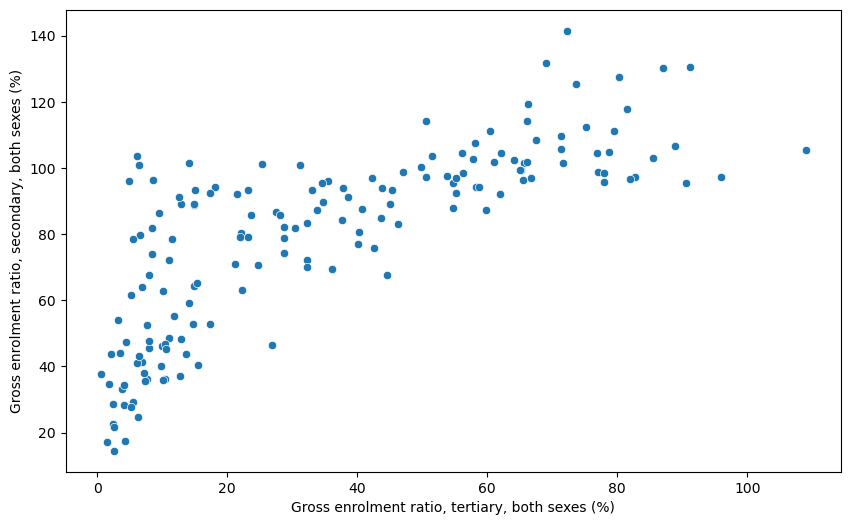

In [943]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, secondary, both sexes (%)", 
    x="Gross enrolment ratio, tertiary, both sexes (%)")

<Axes: xlabel='Internet users (per 100 people)', ylabel='Gross enrolment ratio, secondary, both sexes (%)'>

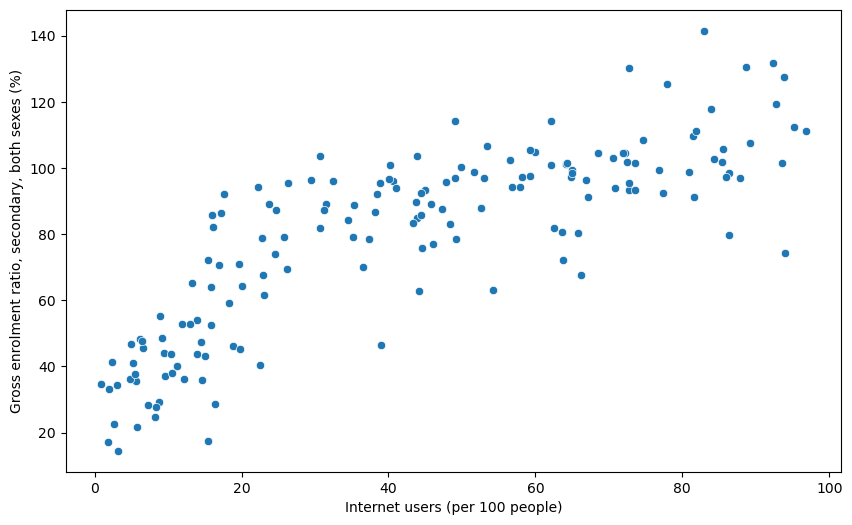

In [945]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, secondary, both sexes (%)", 
    x="Internet users (per 100 people)")

<Axes: xlabel='Personal computers (per 100 people)', ylabel='Gross enrolment ratio, secondary, both sexes (%)'>

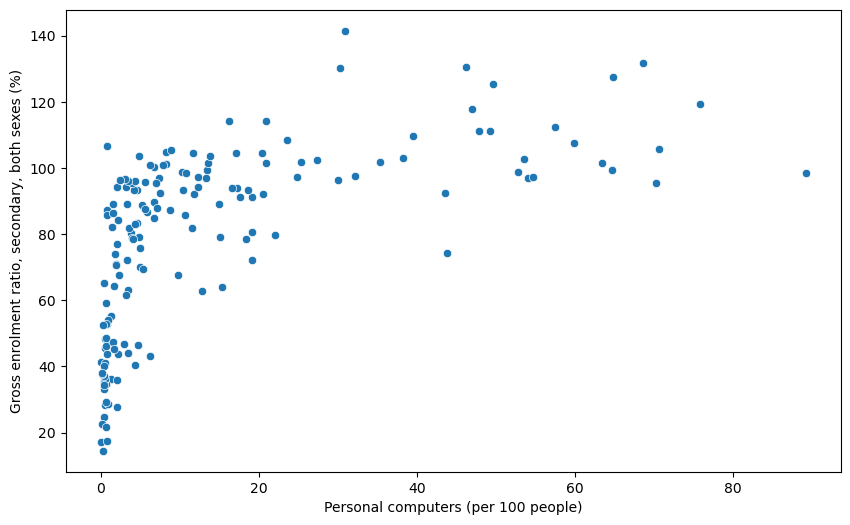

In [947]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, secondary, both sexes (%)", 
    x="Personal computers (per 100 people)")

<Axes: xlabel='Population, ages 15-24, total', ylabel='Gross enrolment ratio, secondary, both sexes (%)'>

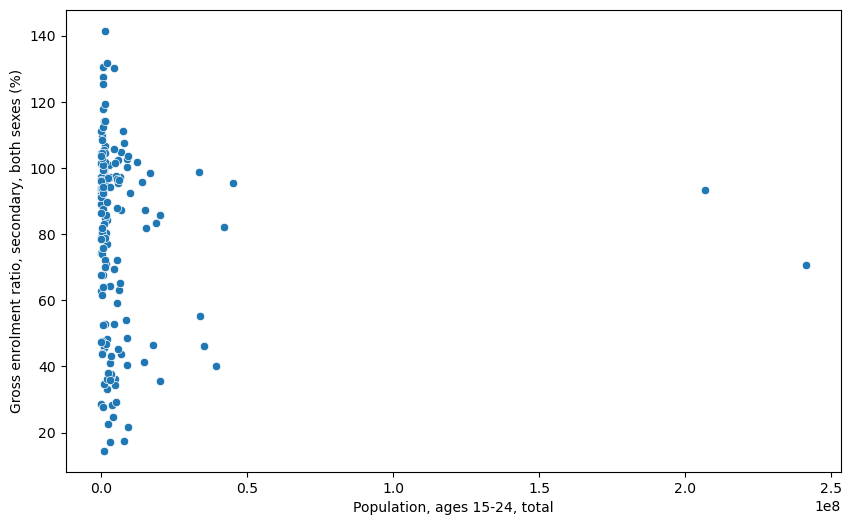

In [949]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, secondary, both sexes (%)", 
    x="Population, ages 15-24, total")

<Axes: xlabel='Pupil-teacher ratio in pre-primary education (headcount basis)', ylabel='Gross enrolment ratio, secondary, both sexes (%)'>

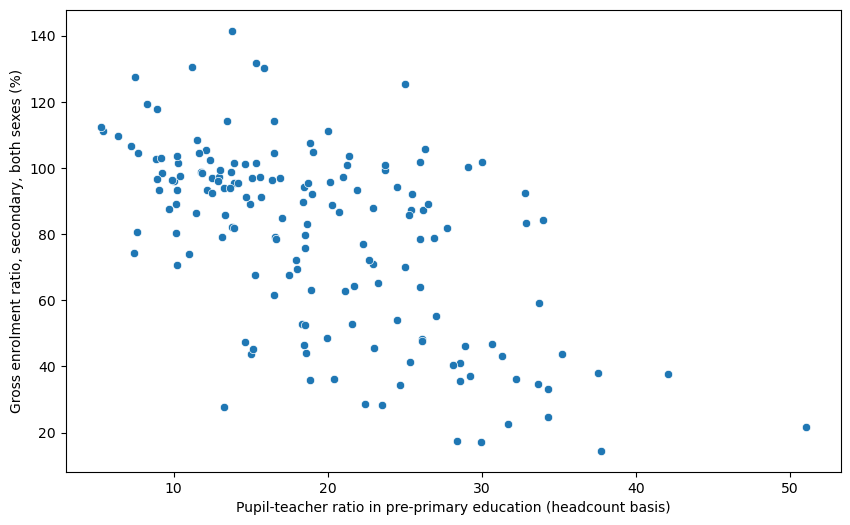

In [951]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, secondary, both sexes (%)", 
    x="Pupil-teacher ratio in pre-primary education (headcount basis)")

<Axes: xlabel='School life expectancy, primary to tertiary, both sexes (years)', ylabel='Gross enrolment ratio, secondary, both sexes (%)'>

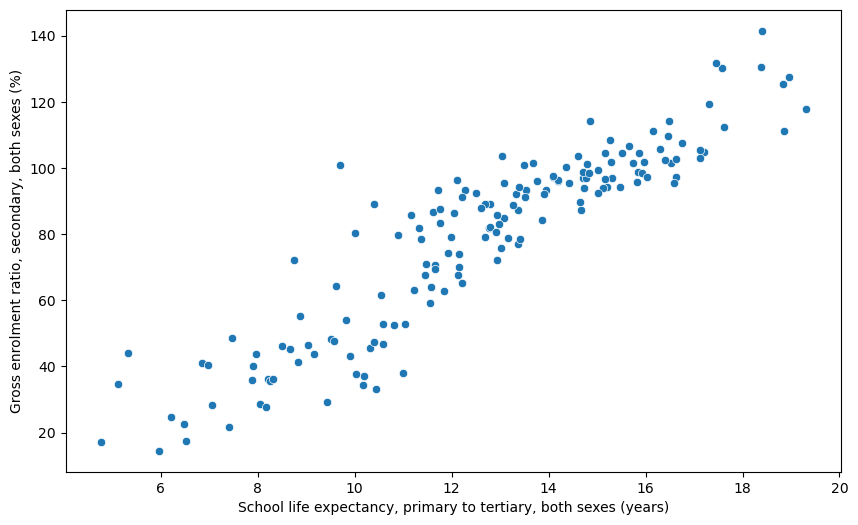

In [953]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, secondary, both sexes (%)", 
    x="School life expectancy, primary to tertiary, both sexes (years)")

<Axes: xlabel='Unemployment, total (% of total labor force)', ylabel='Gross enrolment ratio, secondary, both sexes (%)'>

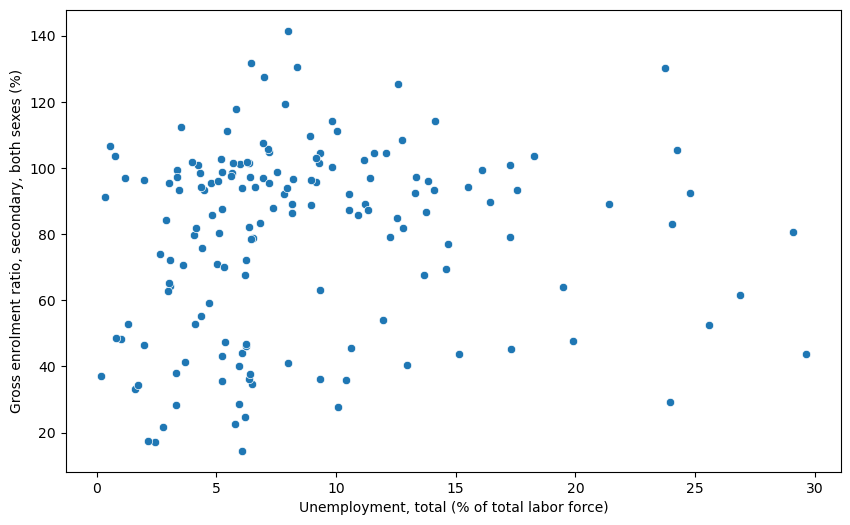

In [955]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, secondary, both sexes (%)", 
    x="Unemployment, total (% of total labor force)")

### Gross enrolment ratio, tertiary, both sexes (%)

<Axes: xlabel='Internet users (per 100 people)', ylabel='Gross enrolment ratio, tertiary, both sexes (%)'>

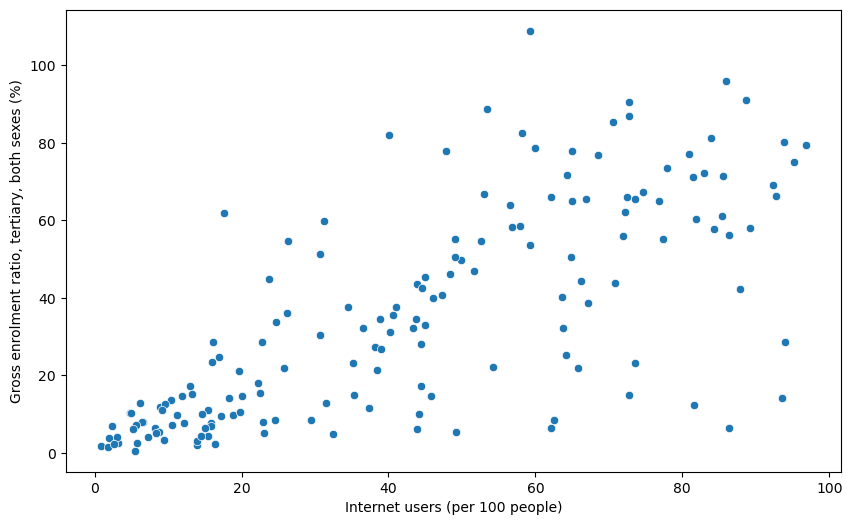

In [958]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, tertiary, both sexes (%)", 
    x="Internet users (per 100 people)")

<Axes: xlabel='Personal computers (per 100 people)', ylabel='Gross enrolment ratio, tertiary, both sexes (%)'>

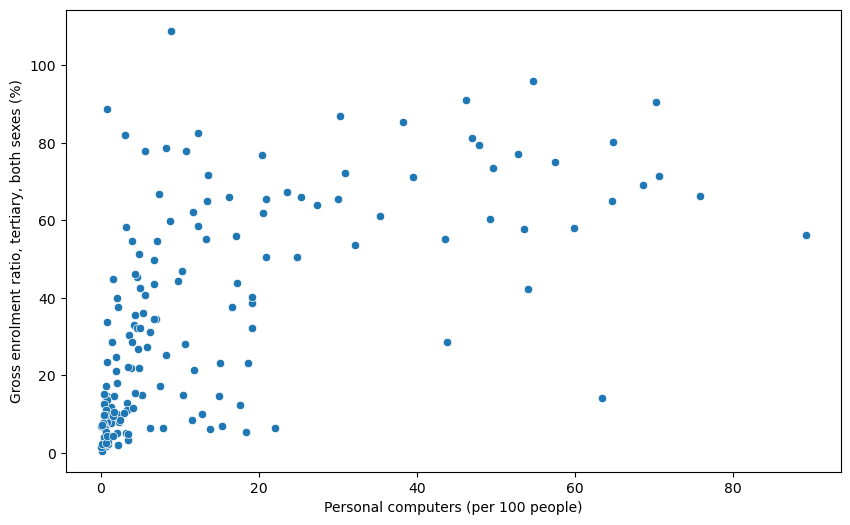

In [960]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, tertiary, both sexes (%)", 
    x="Personal computers (per 100 people)")

<Axes: xlabel='Population, ages 15-24, total', ylabel='Gross enrolment ratio, tertiary, both sexes (%)'>

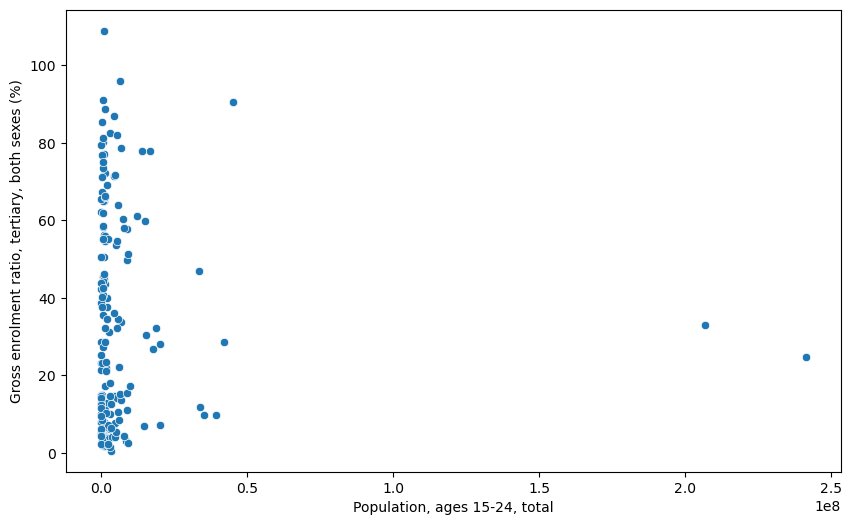

In [962]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, tertiary, both sexes (%)", 
    x="Population, ages 15-24, total")

<Axes: xlabel='Pupil-teacher ratio in pre-primary education (headcount basis)', ylabel='Gross enrolment ratio, tertiary, both sexes (%)'>

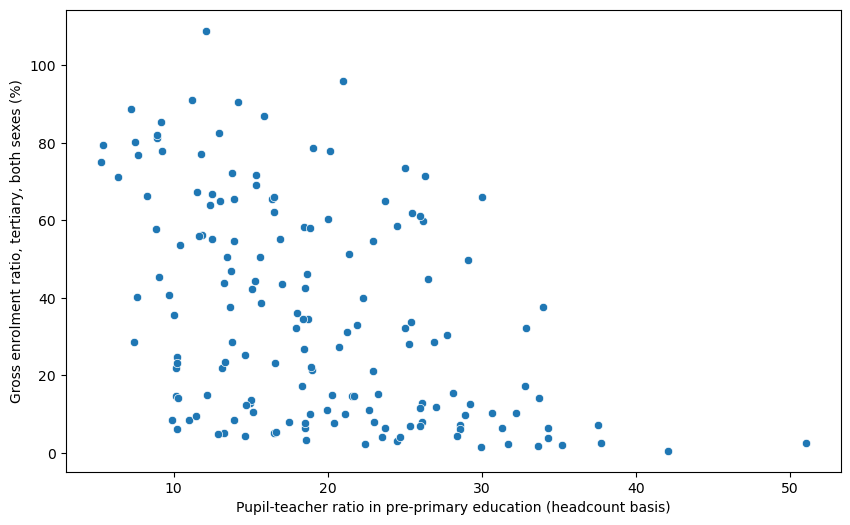

In [964]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, tertiary, both sexes (%)", 
    x="Pupil-teacher ratio in pre-primary education (headcount basis)")

<Axes: xlabel='School life expectancy, primary to tertiary, both sexes (years)', ylabel='Gross enrolment ratio, tertiary, both sexes (%)'>

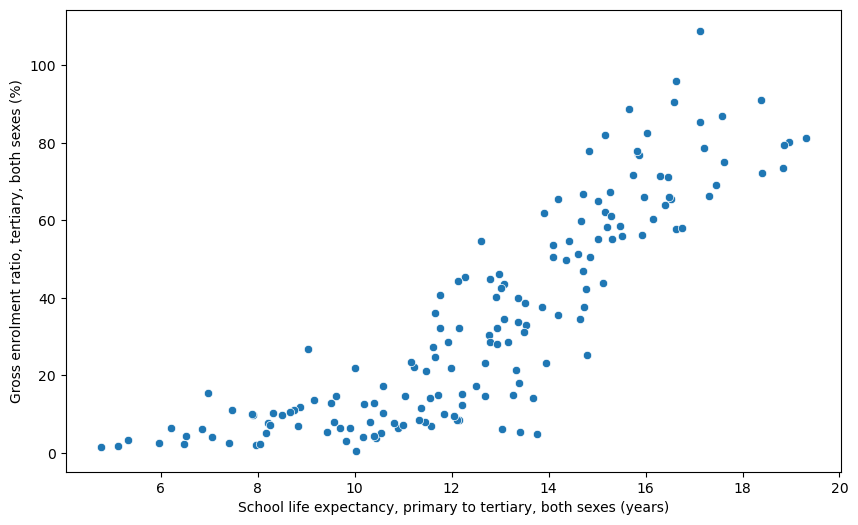

In [966]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, tertiary, both sexes (%)", 
    x="School life expectancy, primary to tertiary, both sexes (years)")

<Axes: xlabel='Unemployment, total (% of total labor force)', ylabel='Gross enrolment ratio, tertiary, both sexes (%)'>

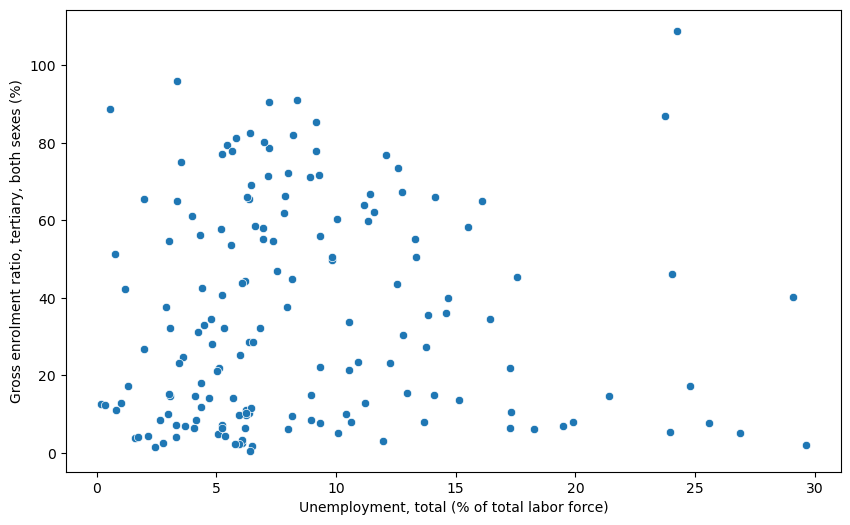

In [968]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Gross enrolment ratio, tertiary, both sexes (%)", 
    x="Unemployment, total (% of total labor force)")

### Internet users (per 100 people)

<Axes: xlabel='Personal computers (per 100 people)', ylabel='Internet users (per 100 people)'>

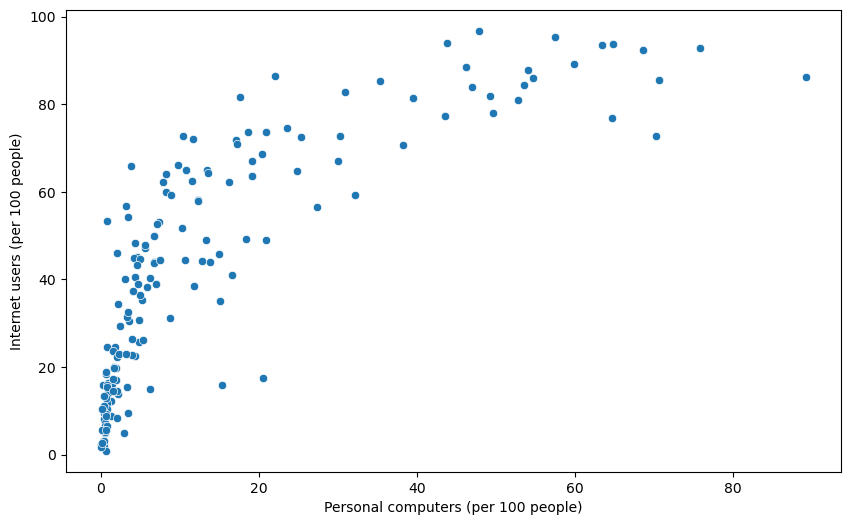

In [971]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Internet users (per 100 people)", 
    x="Personal computers (per 100 people)")

<Axes: xlabel='Population, ages 15-24, total', ylabel='Internet users (per 100 people)'>

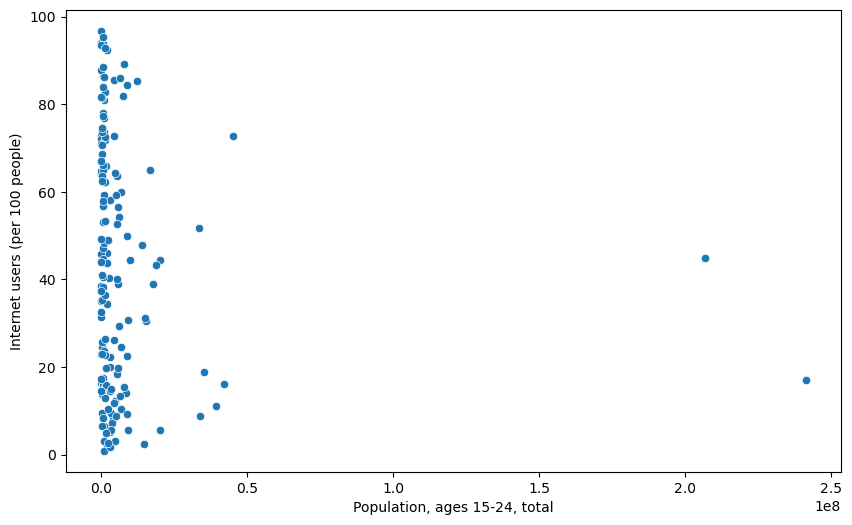

In [973]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Internet users (per 100 people)", 
    x="Population, ages 15-24, total")

<Axes: xlabel='Pupil-teacher ratio in pre-primary education (headcount basis)', ylabel='Internet users (per 100 people)'>

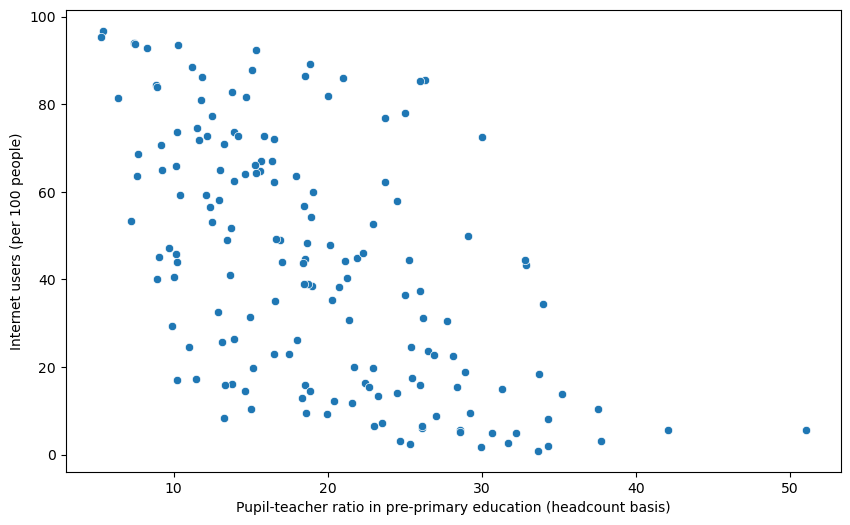

In [975]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Internet users (per 100 people)", 
    x="Pupil-teacher ratio in pre-primary education (headcount basis)")

<Axes: xlabel='School life expectancy, primary to tertiary, both sexes (years)', ylabel='Internet users (per 100 people)'>

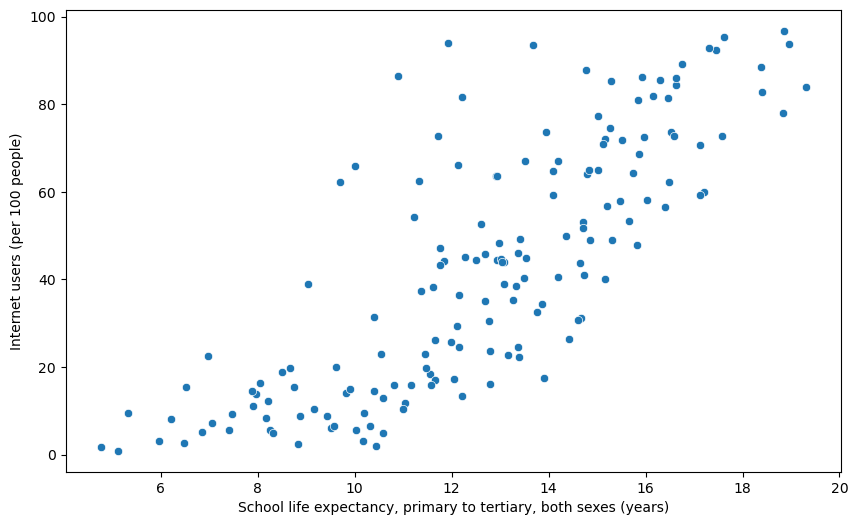

In [977]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Internet users (per 100 people)", 
    x="School life expectancy, primary to tertiary, both sexes (years)")

<Axes: xlabel='Unemployment, total (% of total labor force)', ylabel='Internet users (per 100 people)'>

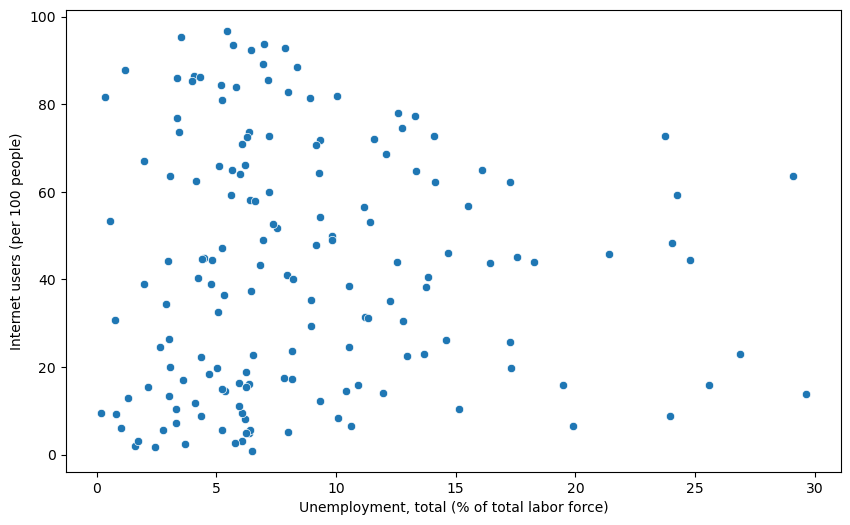

In [979]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Internet users (per 100 people)", 
    x="Unemployment, total (% of total labor force)")

### Personal computers (per 100 people)

<Axes: xlabel='Population, ages 15-24, total', ylabel='Personal computers (per 100 people)'>

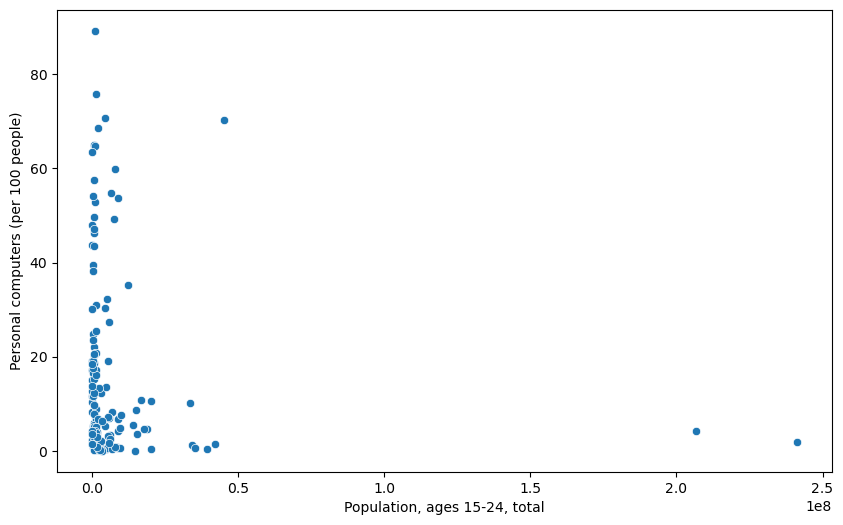

In [982]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Personal computers (per 100 people)", 
    x="Population, ages 15-24, total")

<Axes: xlabel='Pupil-teacher ratio in pre-primary education (headcount basis)', ylabel='Personal computers (per 100 people)'>

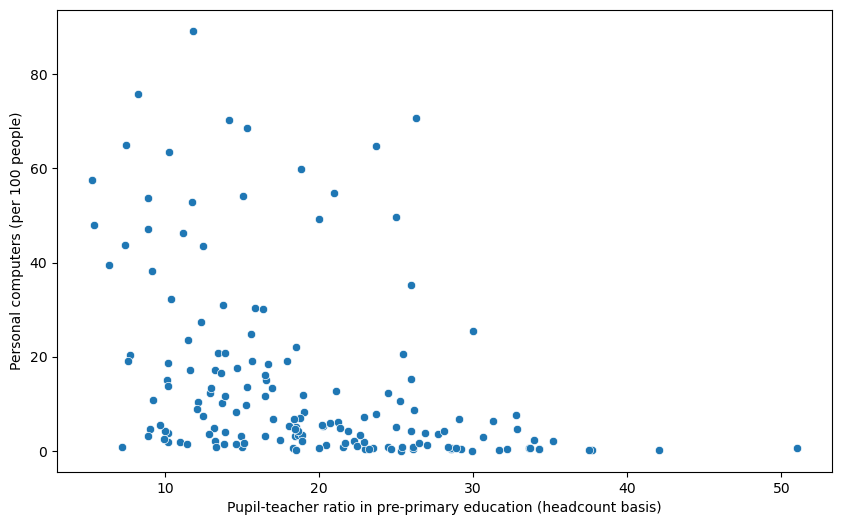

In [984]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Personal computers (per 100 people)", 
    x="Pupil-teacher ratio in pre-primary education (headcount basis)")

<Axes: xlabel='School life expectancy, primary to tertiary, both sexes (years)', ylabel='Personal computers (per 100 people)'>

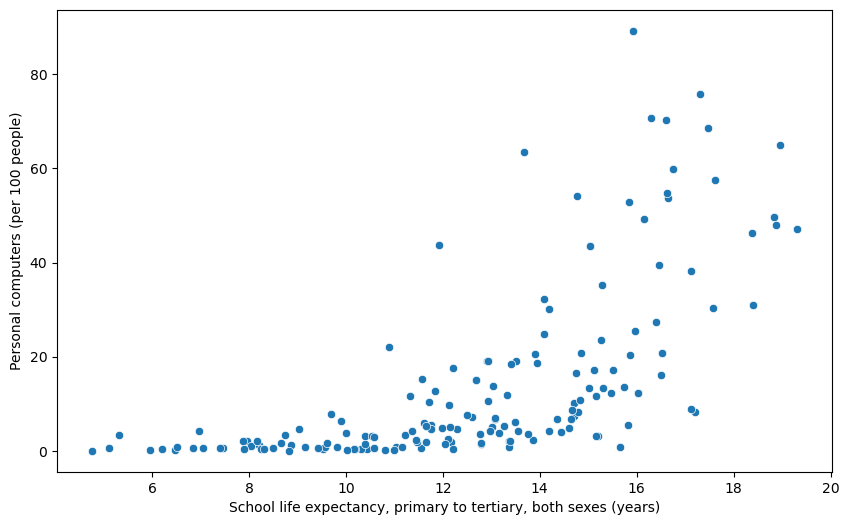

In [986]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Personal computers (per 100 people)", 
    x="School life expectancy, primary to tertiary, both sexes (years)")

<Axes: xlabel='Unemployment, total (% of total labor force)', ylabel='Personal computers (per 100 people)'>

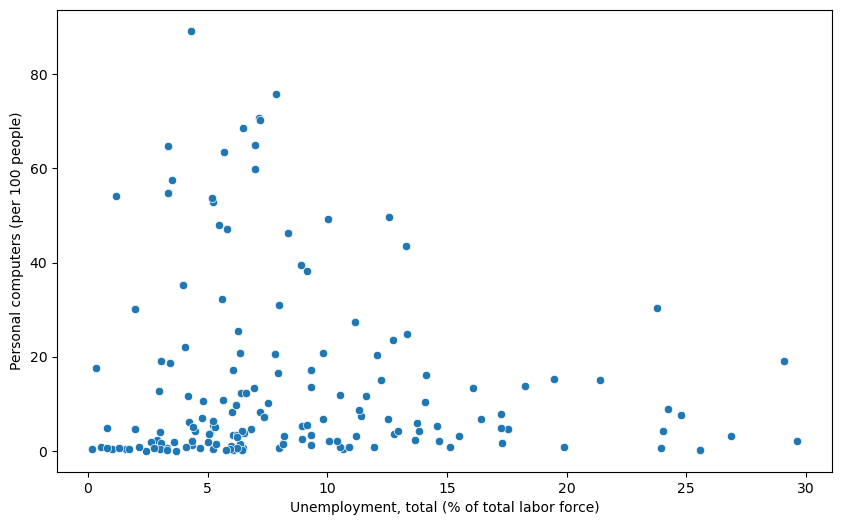

In [988]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Personal computers (per 100 people)", 
    x="Unemployment, total (% of total labor force)")

### Population, ages 15-24, total

<Axes: xlabel='Pupil-teacher ratio in pre-primary education (headcount basis)', ylabel='Population, ages 15-24, total'>

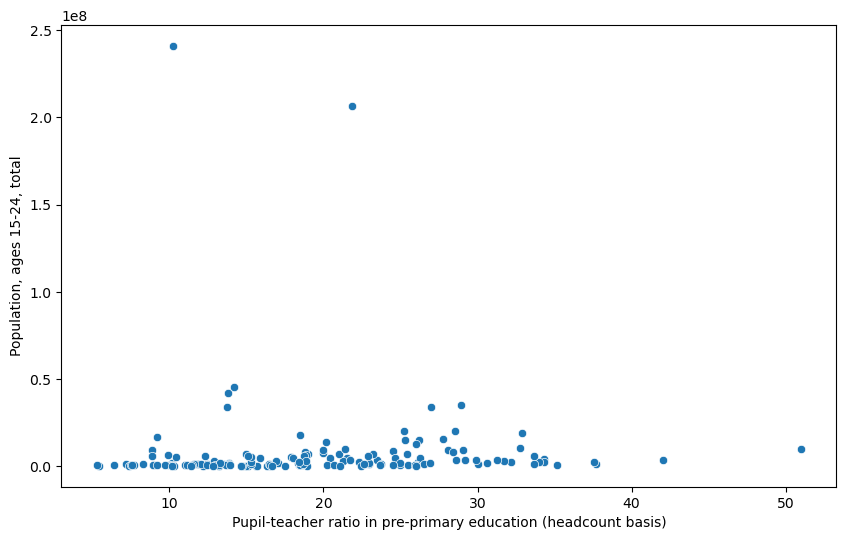

In [991]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Population, ages 15-24, total", 
    x="Pupil-teacher ratio in pre-primary education (headcount basis)")

<Axes: xlabel='School life expectancy, primary to tertiary, both sexes (years)', ylabel='Population, ages 15-24, total'>

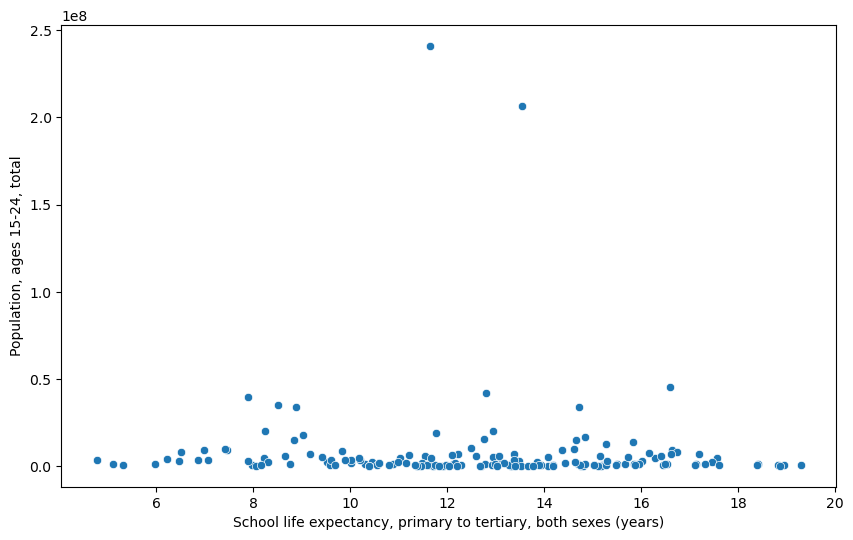

In [993]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Population, ages 15-24, total", 
    x="School life expectancy, primary to tertiary, both sexes (years)")

<Axes: xlabel='Unemployment, total (% of total labor force)', ylabel='Population, ages 15-24, total'>

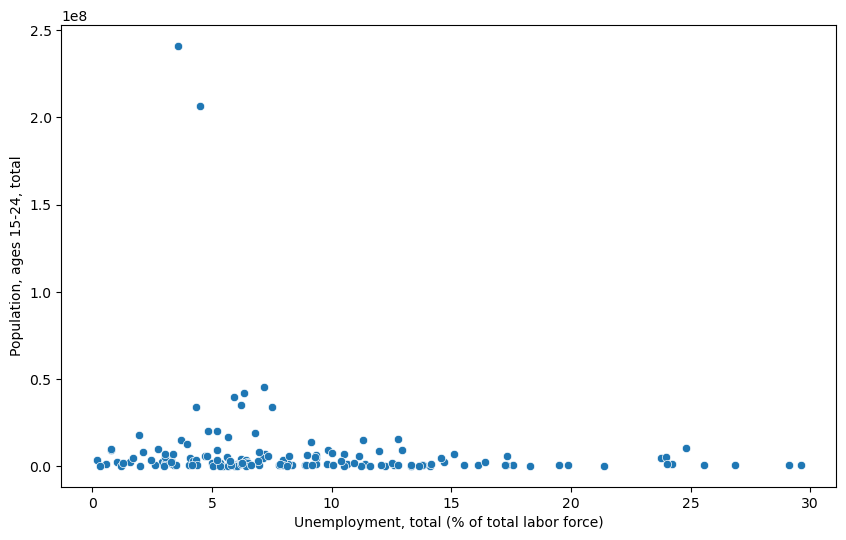

In [995]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Population, ages 15-24, total", 
    x="Unemployment, total (% of total labor force)")

### Pupil-teacher ratio in pre-primary education (headcount basis)

<Axes: xlabel='School life expectancy, primary to tertiary, both sexes (years)', ylabel='Pupil-teacher ratio in pre-primary education (headcount basis)'>

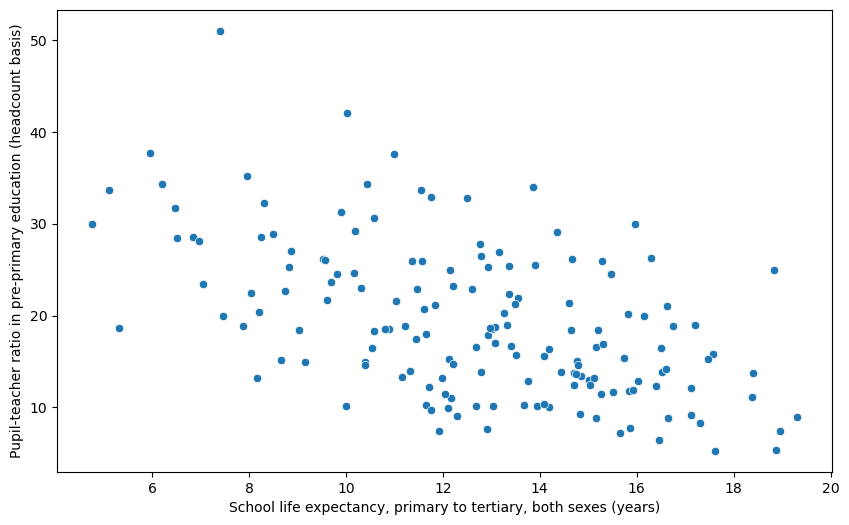

In [1000]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Pupil-teacher ratio in pre-primary education (headcount basis)",
    x="School life expectancy, primary to tertiary, both sexes (years)")

<Axes: xlabel='Unemployment, total (% of total labor force)', ylabel='Pupil-teacher ratio in pre-primary education (headcount basis)'>

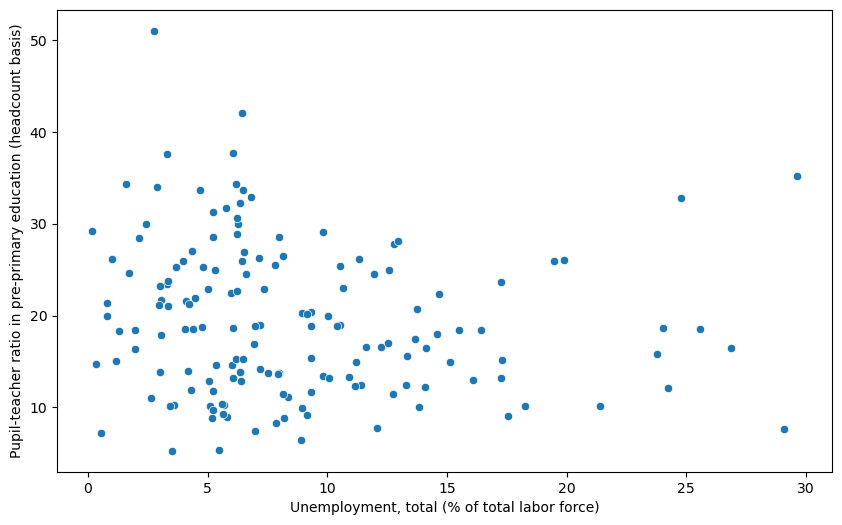

In [1002]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="Pupil-teacher ratio in pre-primary education (headcount basis)", 
    x="Unemployment, total (% of total labor force)")

### School life expectancy, primary to tertiary, both sexes (years)

<Axes: xlabel='Unemployment, total (% of total labor force)', ylabel='School life expectancy, primary to tertiary, both sexes (years)'>

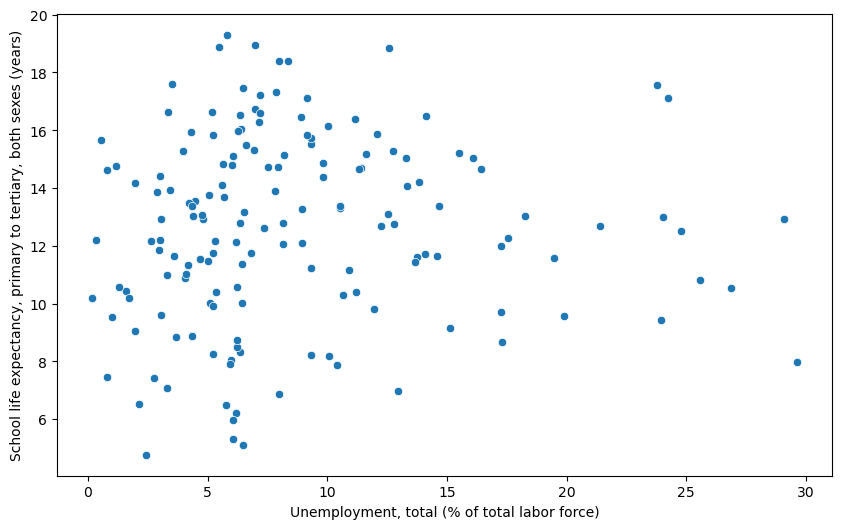

In [1005]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=data["Moyenne 5 ans"], 
    y="School life expectancy, primary to tertiary, both sexes (years)", 
    x="Unemployment, total (% of total labor force)")